In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
import xgboost as xgb
import numpy as np
from scipy.stats import uniform, randint
from sklearn.dummy import DummyRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
goi_id = [
         'ENSG00000141905', #NFIC
         'ENSG00000185811', #IKZF1
         'ENSG00000100811', #YY1
         'ENSG00000143437', #ARNT
         'ENSG00000120837', #NFYB
         'ENSG00000115966', #ATF2
         'ENSG00000185591', #SP1
         'ENSG00000170345', #FOS
         'ENSG00000118260', #CREB1
         'ENSG00000028277', #POU2f2
         'ENSG00000112592', #TBP
         'ENSG00000103495', #MAZ
         'ENSG00000101076', #HNF4A
         'ENSG00000175745', #NR2F1
         'ENSG00000126561', #STAT5A
         'ENSG00000120690', #ELF1
         'ENSG00000179348', #GATA2
         'ENSG00000068305', #MEF2A
         'ENSG00000173039', #RELA
         'ENSG00000066336', #SPI1
         'ENSG00000131196', #NFATC1
         'ENSG00000130522', #JUND
         'ENSG00000118513', #MYB
         'ENSG00000196092', #PAX5
         'ENSG00000164330', #EBF1
         'ENSG00000172216', #CEBPB
         'ENSG00000171223', #JUNB
         'ENSG00000141568', #FOXK2
         'ENSG00000119950', #MXI1
         'ENSG00000147133', #TAF1
         'ENSG00000143373', #ZNF687
         'ENSG00000107485', #GATA3
         'ENSG00000120798', #NR2C1
         'ENSG00000175029', #CTBP2
         'ENSG00000010244', #ZNF207
         'ENSG00000168610', #STAT3
         'ENSG00000170365', #SMAD1
         'ENSG00000169375', #SIN3A
         'ENSG00000167081', #PBX3
         'ENSG00000182979', #MTA1
         'ENSG00000106462', #EZH2
         'ENSG00000148516', #ZEB1
         'ENSG00000089902', #RCOR1
         'ENSG00000143889', #HNRNPLL
         'ENSG00000112658', #SRF
         'ENSG00000069399', #BCL3
         'ENSG00000164754', #RAD21
         'ENSG00000102554', #KLF5
         'ENSG00000125952', #MAX
         'ENSG00000136997', #MYC
         'ENSG00000156273', #BACH1
         'ENSG00000171940', #ZNF217
         'ENSG00000139083', #ETV6
         'ENSG00000074266', #EED
         'ENSG00000119866', #BCL11A
         'ENSG00000104320', #NBN
         'ENSG00000100393', #EP300
         'ENSG00000140262', #TCF12
         'ENSG00000149480', #MTA2
         'ENSG00000104856', #RELB
         'ENSG00000156127', #BATF
         'ENSG00000134107', #BHLHE40
         'ENSG00000073861', #TBX21
         'ENSG00000020633', #RUNX3
         'ENSG00000100219', #XBP1
         'ENSG00000168310', #IRF2
         'ENSG00000115415', #STAT1
         'ENSG00000049768', #FOXP3
         'ENSG00000196628', #TCF4
         'ENSG00000151090', #THRB
         'ENSG00000129514', #FOXA1
         'ENSG00000181195', #PENK
         'ENSG00000091831', #ESR1
         'ENSG00000197780', #TAF13
         'ENSG00000082175', #PGR
         'ENSG00000135100', #HNF1A
         'ENSG00000143190', #POU2F1
         'ENSG00000101096', #NFATC2
         'ENSG00000186350', #RXRA
         'ENSG00000169083', #AR
         'ENSG00000128710', #HOXD10
         'ENSG00000077092', #RARB
         'ENSG00000111424', #VDR
         'ENSG00000005436', #GCFC2
         'ENSG00000123268', #ATF1
         'ENSG00000168214', #RBPJ
         'ENSG00000113580', #NR3C1
         'ENSG00000141510', #TP53
         'ENSG00000184895', #SRY
         'ENSG00000245848', #CEBPA
         'ENSG00000128709', #HOXD9
         'ENSG00000162772', #ATF3
         'ENSG00000175832', #ETV4
         'ENSG00000101412', #E2F1
         'ENSG00000140374', #ETFA
         'ENSG00000105379', #ETFB
         'ENSG00000179388', #EGR3
         'ENSG00000184937', #WT1
         'ENSG00000106546', #AHR
         'ENSG00000131759', #RARA
         'ENSG00000109320', #NFKB1
         'ENSG00000105698', #USF2
         'ENSG00000125347', #IRF1
         'ENSG00000138795', #LEF1
         'ENSG00000126767', #ELK1
         'ENSG00000138378', #STAT4
         'ENSG00000102145', #GATA1
         'ENSG00000157557', #ETS2
         'ENSG00000134954', #ETS1
         'ENSG00000004468' #CD38
        ]

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))
    
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
#         i = 201 - i
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [3]:
pat = pd.read_csv('~/COMMPASS/COMMPASS/IA13/Expression Estimates - Gene Based/MMRF_CoMMpass_IA13a_E74GTF_HtSeq_Gene_Counts.csv')
pat = pat.set_index(pat.GENE_ID)
pat = pat.drop(columns = 'GENE_ID')

goi_names = pd.read_csv('cd138genes.csv', header = None)

In [4]:
pat = pat.loc[:, pat.columns.str.endswith('1_BM')]

In [5]:
goi_pat = pat.loc[goi_id]

In [6]:
goi_names = goi_names.rename({0 :'GENE_NAMES'}, axis = 1)

In [7]:
goi_pat = goi_pat.set_index(goi_names.iloc[:, 0])

In [8]:
goi_pat = goi_pat.T
goi_pat_log = np.log2(goi_pat)

In [9]:
y_log = goi_pat_log.CD38

In [10]:
X_log = goi_pat_log.drop('CD38', axis = 1)

In [11]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, 
                                                                    random_state=42)

In [12]:
xgb_model_f = xgb.XGBRegressor(
    colsample_bylevel = 0.6193383338859322, colsample_bynode = 0.7285300271036474, 
    colsample_bytree = 0.8389296048351383, gamma = 0.9164228236791261, n_jobs = -1, random_state = 42,
    learning_rate = 0.055646060612889785, max_depth = 4, n_estimators = 163, subsample = 0.6204024819228363
)

In [13]:
xgb_model_f.fit(X_log_train, y_log_train)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6193383338859322,
             colsample_bynode=0.7285300271036474,
             colsample_bytree=0.8389296048351383, gamma=0.9164228236791261,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.055646060612889785, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=163, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.6204024819228363, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [14]:
y_pred = xgb_model_f.predict(X_log_test)

In [15]:
X_log_test

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,RARA,NFKB1,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1
MMRF_2651_1_BM,10.544964,13.010178,12.493605,12.425216,10.226412,11.834866,12.647908,13.780335,11.364682,13.461479,...,11.540128,12.573884,13.220378,14.508290,13.403412,11.084144,10.005625,3.906891,8.174926,6.228819
MMRF_1768_1_BM,10.075479,11.556506,12.060358,10.969387,9.990104,12.114718,12.008779,13.912609,11.502335,13.803223,...,9.467606,11.465566,13.245256,12.687157,2.807355,10.319672,4.584963,2.321928,1.000000,9.535275
MMRF_1030_1_BM,7.577429,11.459432,11.424166,9.417853,9.614710,10.029287,10.429407,16.249632,10.216746,12.104926,...,7.954196,11.049849,12.636851,12.562958,3.169925,9.489848,9.571753,-inf,3.584963,9.894818
MMRF_1556_1_BM,10.980854,13.222493,13.053417,11.219774,10.591522,12.651724,12.734710,19.176485,11.836050,13.190596,...,9.579316,11.700873,12.940497,12.426265,4.807355,10.613789,11.078818,3.321928,7.417853,5.584963
MMRF_1845_1_BM,10.301496,11.437752,11.531869,10.386940,9.344296,10.848623,11.266787,16.219263,10.172428,12.202124,...,9.548822,10.675075,12.689124,12.308623,5.754888,9.733015,9.487840,3.584963,4.247928,8.651052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2150_1_BM,10.167418,12.414421,11.562719,10.679480,9.736402,11.125413,10.788718,15.087256,9.951285,12.588246,...,8.810572,9.674192,12.655531,10.941048,1.584963,9.661778,7.022368,3.000000,1.000000,10.660887
MMRF_1713_1_BM,10.491853,13.111788,12.412570,10.586840,10.372865,11.086136,11.545930,17.156221,11.224002,13.556386,...,10.135709,12.310613,13.177108,12.422590,-inf,10.792790,10.712527,1.584963,5.321928,12.522582
MMRF_1080_1_BM,9.930737,11.390169,10.727920,8.930737,9.116344,9.816984,10.074141,17.345570,10.091435,12.098361,...,9.521600,10.897845,12.075813,10.312883,1.000000,8.375039,8.727920,3.321928,5.977280,5.584963
MMRF_2489_1_BM,8.710806,12.317695,11.995060,10.690871,9.541097,10.681238,10.410451,16.564015,11.341519,11.566530,...,9.400879,12.498351,13.508042,14.135389,1.584963,10.060696,7.066089,2.584963,6.228819,12.970645


In [16]:
y_pred = pd.Series(y_pred, index = y_log_test.index)

In [17]:
y_log_test.index

Index(['MMRF_2651_1_BM', 'MMRF_1768_1_BM', 'MMRF_1030_1_BM', 'MMRF_1556_1_BM',
       'MMRF_1845_1_BM', 'MMRF_2087_1_BM', 'MMRF_2793_1_BM', 'MMRF_1750_1_BM',
       'MMRF_1906_1_BM', 'MMRF_2696_1_BM',
       ...
       'MMRF_1210_1_BM', 'MMRF_2290_1_BM', 'MMRF_2729_1_BM', 'MMRF_2314_1_BM',
       'MMRF_2268_1_BM', 'MMRF_2150_1_BM', 'MMRF_1713_1_BM', 'MMRF_1080_1_BM',
       'MMRF_2489_1_BM', 'MMRF_2574_1_BM'],
      dtype='object', length=154)

(11.75, 16.9)

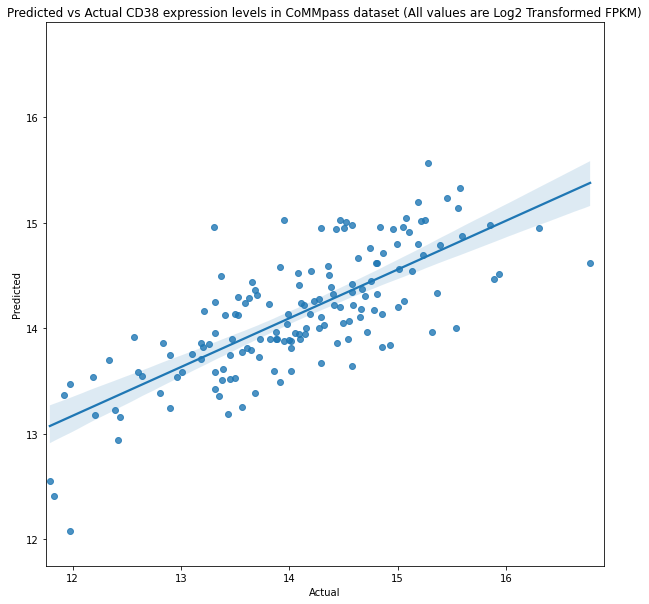

In [18]:
plt.figure(figsize=(10,10))

plt.title("Predicted vs Actual CD38 expression levels in CoMMpass dataset (All values are Log2 Transformed FPKM)")

sns.regplot(x = y_log_test, y = y_pred)

plt.xlabel('Actual')

plt.ylabel('Predicted')

plt.xlim(11.75, 16.9)

plt.ylim(11.75, 16.9)

In [19]:
mean_squared_error(y_log_test, y_pred)#, squared = False)

0.4129432670848586

In [20]:
mean_squared_error(y_log_test, y_pred, squared = False)

0.642606619235173

In [21]:
np.sqrt(0.384)

0.6196773353931867

In [22]:
cell = pd.read_csv('HMCL66_HTSeq_GENE_Counts_v2.csv')

In [23]:
cell.set_index(cell.Sample)

,Sample,GENE_NAME,ALMC1_DJ_p27,ALMC2_DJ_p11,AMO1_DSMZ_p8,ANBL6_DJ2_p13,COLO677_DSMZ_p8,Delta47_JCRB_p16,DP6_DJ_p7,EJM_DSMZ_p9,...,RPMI8226_ATCC_p7,SKMM1_p6,SKMM2_DSMZ_p17,U266_ATCC_p8,UTMC2_p6,VP6_DJ_p5,XG1_p5,XG2_p5,XG6_p5,XG7_p6
Sample,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,ENSG00000000003,TSPAN6,2,0,100,2,0,0,2,88,...,2,0,0,0,0,0,0,0,2,114
ENSG00000000005,ENSG00000000005,TNMD,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ENSG00000000419,ENSG00000000419,DPM1,3949,4134,4795,8278,2262,2587,3607,2450,...,2694,1247,3263,3044,3108,4538,7336,4430,9279,13828
ENSG00000000457,ENSG00000000457,SCYL3,1597,1513,2412,1988,1530,926,1415,573,...,665,994,497,1611,1603,1375,1426,893,1540,1660
ENSG00000000460,ENSG00000000460,C1orf112,3072,1488,2193,4091,3208,1170,3614,1618,...,1472,1517,1346,2068,3128,1850,2522,2320,793,689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000259167,ENSG00000259167,RP11-114N19.1,0,0,0,0,0,1,0,1,...,0,14,0,0,0,0,0,1,0,2
ENSG00000259168,ENSG00000259168,RP11-100M12.3,1,0,0,1,0,2,1,0,...,0,0,0,0,16,0,0,6,0,0
ENSG00000259169,ENSG00000259169,AL132778.1,0,1,2,1,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [24]:
goi_cell = cell.set_index(cell.Sample).loc[goi_id]

In [25]:
goi_cell = goi_cell.drop(['Sample', 'GENE_NAME'], axis = 1)

In [26]:
goi_cell.head()

,ALMC1_DJ_p27,ALMC2_DJ_p11,AMO1_DSMZ_p8,ANBL6_DJ2_p13,COLO677_DSMZ_p8,Delta47_JCRB_p16,DP6_DJ_p7,EJM_DSMZ_p9,FLAM76_JCRB_p10,FR4_p6,...,RPMI8226_ATCC_p7,SKMM1_p6,SKMM2_DSMZ_p17,U266_ATCC_p8,UTMC2_p6,VP6_DJ_p5,XG1_p5,XG2_p5,XG6_p5,XG7_p6
Sample,,,,,,,,,,,,,,,,,,,,,
ENSG00000141905,1100,2718,1397,164,2628,2131,1586,439,1986,1405,...,1398,1839,2015,86,2096,2826,56,2540,27,2367
ENSG00000185811,11866,14077,4664,9549,11944,3332,11061,7050,4660,135,...,8449,8026,7184,6408,25897,15667,8150,13656,5132,7308
ENSG00000100811,13744,15482,11248,10612,16715,6582,8108,10835,5573,4822,...,6453,10295,9214,9894,13105,7410,9376,13918,9172,8385
ENSG00000143437,5042,35153,37016,5465,7638,11174,9036,2443,3229,6112,...,3405,7793,2947,5049,7695,7048,4118,8081,4952,14606
ENSG00000120837,3271,3409,3367,4599,1733,1462,2566,1721,1876,1285,...,1235,1145,2681,2746,4160,2197,5131,4804,1666,2070


In [27]:
goi_pat_log

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,NFKB1,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38
MMRF_2801_1_BM,9.426265,11.168045,12.202124,9.511753,9.236014,10.743993,10.819381,16.477632,11.320236,11.084144,...,11.704336,12.610102,13.367551,4.169925,9.936638,10.284246,4.584963,8.124121,7.894818,13.648020
MMRF_2718_1_BM,10.933691,12.347345,13.077483,10.900112,10.958553,12.195987,12.305207,15.850089,12.589651,13.002639,...,12.543515,13.621365,14.659996,6.247928,10.053926,10.332037,4.584963,7.409391,8.741467,14.144340
MMRF_2815_1_BM,9.370687,12.350663,12.542065,9.774787,9.936638,10.981567,11.682995,12.476240,11.603163,12.479022,...,12.262095,12.911205,14.869015,4.087463,9.887221,10.820977,3.459432,7.149747,6.442943,13.451726
MMRF_1656_1_BM,11.709084,11.575066,12.055960,11.373953,9.912889,10.597121,11.789941,14.756713,10.854868,12.868437,...,10.714246,12.399011,13.372865,7.118941,10.000000,9.301496,2.000000,3.906891,9.675957,14.299566
MMRF_2461_1_BM,8.527477,13.006151,12.013672,10.048487,9.479780,10.745674,11.379378,16.489472,10.703904,12.750079,...,13.177887,13.626850,13.510270,3.459432,10.677720,10.834471,3.700440,12.835853,7.562242,13.172428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2795_1_BM,7.392317,11.437752,11.489848,8.535275,9.424166,9.583083,8.876517,13.768908,10.095397,10.820179,...,12.312599,12.788311,13.110646,7.741467,8.960002,7.209453,2.321928,7.348728,7.686501,11.976564
MMRF_2316_1_BM,10.273796,11.356452,11.817783,9.228819,10.133142,11.470659,11.113742,18.187168,10.590587,11.658211,...,10.849405,12.339572,12.836445,4.087463,9.118941,10.601771,1.000000,6.629357,6.169925,14.494106
MMRF_2440_1_BM,8.392317,12.066089,11.756973,9.729621,9.487840,10.306062,11.142745,16.080110,10.746514,11.577429,...,10.772315,12.901621,11.934059,3.000000,9.859535,8.640245,1.584963,4.169925,5.643856,14.941277
MMRF_2731_1_BM,11.167418,12.890264,12.616549,11.179287,10.153552,10.713387,12.386671,13.489597,11.100005,12.677499,...,12.550266,13.473579,14.295267,6.658211,10.625709,9.761551,3.807355,5.209453,7.569856,15.112847


In [28]:
goi_pat_log.describe()

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,NFKB1,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,...,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,9.586622,12.316654,11.982330,10.594031,10.139773,11.177667,11.721035,16.185024,11.070626,12.801230,...,11.520641,12.912519,12.915527,-inf,10.114286,9.544922,-inf,-inf,9.321444,14.127039
std,1.553188,0.710899,0.600234,0.867997,0.709600,0.707615,0.770381,1.518052,0.669364,0.915625,...,0.928599,0.535629,1.183332,NaN,0.700607,1.534178,NaN,NaN,2.360452,0.878690
min,3.169925,9.882643,9.854868,8.463524,6.629357,8.870365,8.876517,9.008429,8.577429,8.930737,...,9.269127,11.015415,9.321928,-inf,7.748193,1.000000,-inf,-inf,3.169925,9.586840
25%,8.592438,11.821375,11.561288,9.951284,9.681234,10.727920,11.205488,15.406716,10.612407,12.255912,...,10.899733,12.564029,12.170238,3.000000,9.643855,8.816984,2.321928,4.000000,7.592380,13.626051
50%,9.965784,12.346237,11.975848,10.552669,10.153552,11.173052,11.746094,16.448455,11.069450,12.847645,...,11.408860,12.927408,12.845882,4.807355,10.100662,9.731319,3.321928,5.523562,9.459432,14.147602
75%,10.696096,12.791060,12.387748,11.168337,10.652845,11.661778,12.241238,17.223082,11.519631,13.445532,...,12.023581,13.268030,13.610676,7.214246,10.542548,10.553628,4.321928,7.262087,11.045076,14.701875
max,12.680360,15.122990,14.112440,13.956830,12.223097,13.501340,14.385862,19.787141,13.234219,15.412801,...,15.999736,14.998017,16.855538,13.403412,12.771283,13.807757,9.656425,13.005975,15.269857,16.776562


In [29]:
goi_cell_log = np.log2(goi_cell)

In [30]:
goi_cell_log = goi_cell_log.set_index(goi_pat_log.columns)

In [31]:
goi_cell_log = goi_cell_log.T

In [32]:
y_cell_log = goi_cell_log.CD38

In [33]:
X_cell_log = goi_cell_log.drop('CD38', axis = 1)

In [34]:
y_pred_cell = xgb_model_f.predict(X_cell_log)

In [35]:
y_pred_cell = pd.Series(y_pred_cell, index = y_cell_log.index)

Text(0, 0.5, 'Predicted')

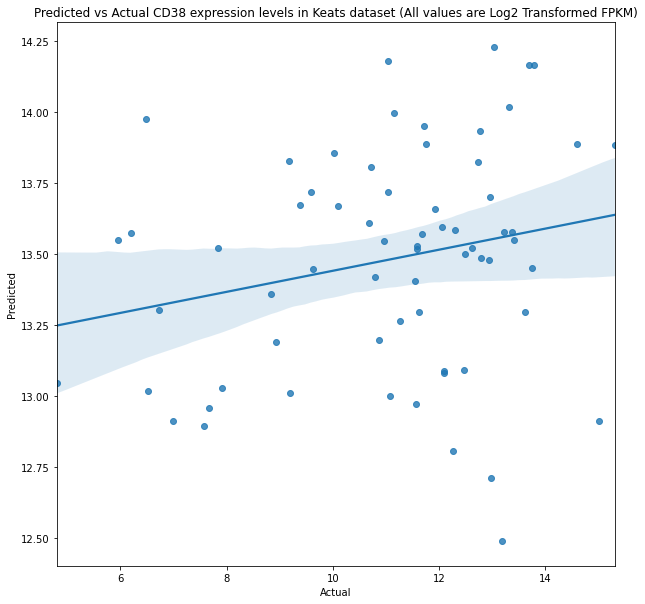

In [36]:
plt.figure(figsize=(10,10))

plt.title("Predicted vs Actual CD38 expression levels in Keats dataset (All values are Log2 Transformed FPKM)")

sns.regplot(x = y_cell_log, y = y_pred_cell)

plt.xlabel('Actual')

plt.ylabel('Predicted')

# plt.xlim(11.75, 16.9)

# plt.ylim(11.75, 16.9)

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CD38 expression in cells')

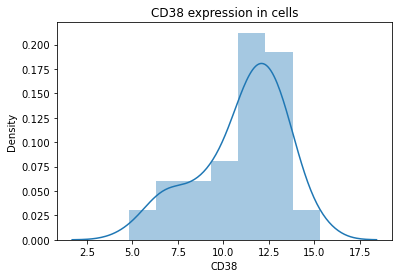

In [37]:
sns.distplot(y_cell_log)
plt.title("CD38 expression in cells")

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CD38 expression in patients')

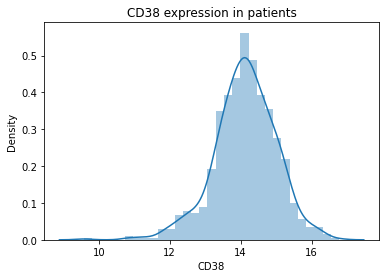

In [38]:
sns.distplot(y_log)
plt.title("CD38 expression in patients")

In [39]:
X_cell_log

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,RARA,NFKB1,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1
ALMC1_DJ_p27,10.103288,13.534546,13.746514,12.299780,11.675516,12.151968,13.493981,8.636625,11.868437,11.795634,...,9.707359,11.976206,12.740202,10.584963,8.962896,11.384784,7.139551,0.000000,4.087463,14.548641
ALMC2_DJ_p11,11.408330,13.781052,13.918304,15.101360,11.735133,13.134426,13.713279,7.417853,12.459432,13.135068,...,10.211888,12.527966,12.938109,9.634811,10.835261,11.474213,11.040290,0.000000,4.643856,13.586019
AMO1_DSMZ_p8,10.448116,12.187352,13.457381,15.175861,11.717248,12.416534,13.953833,9.712527,12.490099,10.107217,...,12.233020,12.855258,12.848819,12.416534,11.033423,12.131535,8.134426,0.000000,-inf,9.211888
ANBL6_DJ2_p13,7.357552,13.221134,13.373409,12.416006,12.167104,12.987264,13.844804,6.820179,12.207014,12.052908,...,10.045760,13.106236,12.501588,11.303781,12.244364,12.464801,12.632541,0.000000,2.000000,14.763575
COLO677_DSMZ_p8,11.359750,13.543998,14.028856,12.898979,10.759056,12.749450,13.726005,10.862637,12.760304,4.000000,...,11.051889,12.904446,11.667555,10.792790,9.754888,12.297490,10.689124,-inf,9.812177,11.702173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VP6_DJ_p5,11.464546,13.935441,12.855258,12.782998,11.101319,12.911579,12.650603,5.285402,12.228819,11.363040,...,12.471167,12.895765,11.606868,13.132339,13.081317,11.855647,5.169925,1.584963,2.807355,14.452370
XG1_p5,5.807355,12.992584,13.194757,12.007728,12.325024,12.418380,13.319390,8.098032,11.835656,12.649032,...,10.182394,12.281640,12.746514,11.800091,11.750288,12.709945,9.501837,2.321928,-inf,9.226412
XG2_p5,11.310613,13.737247,13.764664,12.980318,12.230020,12.923699,13.410319,10.401946,11.989749,11.733439,...,9.674192,12.809567,12.682995,13.153552,12.683433,11.939212,7.948367,-inf,-inf,8.164907
XG6_p5,4.754888,12.325305,13.163021,12.273796,10.702173,12.721099,13.287712,9.751544,11.524052,14.222644,...,10.483816,10.421013,12.890834,11.245553,8.588715,11.839991,11.598983,3.459432,1.000000,11.853310


In [40]:
y_cell_log[y_cell_log<10]

JJN3_DSMZ_p8          7.000000
Karpas620_DSMZ_p14    9.618386
KAS61_DJ_p5           6.491853
KMM1_JCRB_p13         9.184875
KMS11_JCRB_Adh_p9     7.665336
KMS11_JCRB_Sus_p12    4.807355
KMS20_JCRB_p18        7.906891
KMS26_JCRB_p9         9.177420
KMS27_JCRB_p8         9.377211
KMS28BM_JCRB_p9       8.924813
L363_DSMZ_p8          9.592457
MMM1_p5               6.523562
OCIMY1_p6             6.727920
OCIMY5_p10            7.569856
PE2_PLB_p9            7.832890
SKMM1_p6              8.842350
U266_ATCC_p8          6.209453
XG6_p5                5.954196
Name: CD38, dtype: float64

In [41]:
y_cell_log[y_cell_log<10].size

18

In [42]:
y_cell_log[y_cell_log<11]

DP6_DJ_p7             10.687376
H1112_p5              10.785452
JJN3_DSMZ_p8           7.000000
Karpas620_DSMZ_p14     9.618386
KAS61_DJ_p5            6.491853
KMM1_JCRB_p13          9.184875
KMS11_JCRB_Adh_p9      7.665336
KMS11_JCRB_Sus_p12     4.807355
KMS18_p12             10.725366
KMS20_JCRB_p18         7.906891
KMS26_JCRB_p9          9.177420
KMS27_JCRB_p8          9.377211
KMS28BM_JCRB_p9        8.924813
KMS34_JCRB_p10        10.091435
L363_DSMZ_p8           9.592457
MMM1_p5                6.523562
OCIMY1_p6              6.727920
OCIMY5_p10             7.569856
OPM1_p7               10.962173
PE2_PLB_p9             7.832890
RPMI8226_ATCC_p7      10.865733
SKMM1_p6               8.842350
U266_ATCC_p8           6.209453
UTMC2_p6              10.014020
XG6_p5                 5.954196
Name: CD38, dtype: float64

In [43]:
y_cell_log[y_cell_log<11].size

25

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CD38', ylabel='Density'>

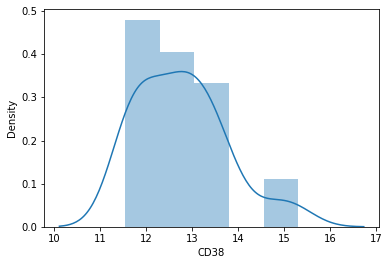

In [44]:
sns.distplot(y_cell_log[y_cell_log>=11.5])

In [45]:
y_cell_log[y_cell_log>=11.5].index

Index(['ALMC1_DJ_p27', 'ALMC2_DJ_p11', 'AMO1_DSMZ_p8', 'ANBL6_DJ2_p13',
       'COLO677_DSMZ_p8', 'Delta47_JCRB_p16', 'EJM_DSMZ_p9', 'FLAM76_JCRB_p10',
       'FR4_p6', 'JIM1_ECACC_p11', 'JIM3_ECACC_p10', 'JK6L_p5', 'JMW1_PLB_p6',
       'Karpas25_ECACC_p8', 'Karpas417_ECACC_p12', 'Karpas929_ECACC_p10',
       'Karpas929_ECACC_p15', 'KHM11_p7', 'KMS12BM_JCRB_p9', 'KMS12PE_JCRB_p9',
       'KMS21BM_JCRB_p10', 'KMS28PE_JCRB_p9', 'KP6_DJ_p8', 'LP1_DSMZ_p9',
       'MM1R_ATCC_p7', 'MOLP2_DSMZ_p18', 'MOLP8_DSMZ_p9', 'NCIH929_DSMZ_p8',
       'OCIMY7_p8', 'OH2_PLB_p8', 'OPM2_DSMZ_p9', 'PCM6_Riken_p6',
       'PE1_PLB_p10', 'XG1_p5', 'XG2_p5', 'XG7_p6'],
      dtype='object')

In [46]:
y_cell_log[y_cell_log>=11.5].size

36

In [47]:
y_pred_cell.loc[y_cell_log[y_cell_log>=11.5].index]

ALMC1_DJ_p27           13.701261
ALMC2_DJ_p11           13.594946
AMO1_DSMZ_p8           13.527518
ANBL6_DJ2_p13          14.228850
COLO677_DSMZ_p8        13.450909
Delta47_JCRB_p16       13.887517
EJM_DSMZ_p9            13.570581
FLAM76_JCRB_p10        14.165311
FR4_p6                 13.577549
JIM1_ECACC_p11         13.518161
JIM3_ECACC_p10         13.293136
JK6L_p5                13.583543
JMW1_PLB_p6            12.708357
Karpas25_ECACC_p8      14.166166
Karpas417_ECACC_p12    13.823999
Karpas929_ECACC_p10    14.018695
Karpas929_ECACC_p15    13.483367
KHM11_p7               12.911220
KMS12BM_JCRB_p9        12.971393
KMS12PE_JCRB_p9        13.080062
KMS21BM_JCRB_p10       12.487529
KMS28PE_JCRB_p9        13.087988
KP6_DJ_p8              13.293172
LP1_DSMZ_p9            13.658113
MM1R_ATCC_p7           13.886000
MOLP2_DSMZ_p18         13.547330
MOLP8_DSMZ_p9          13.884545
NCIH929_DSMZ_p8        13.933111
OCIMY7_p8              13.091676
OH2_PLB_p8             13.521350
OPM2_DSMZ_

Text(0, 0.5, 'Predicted')

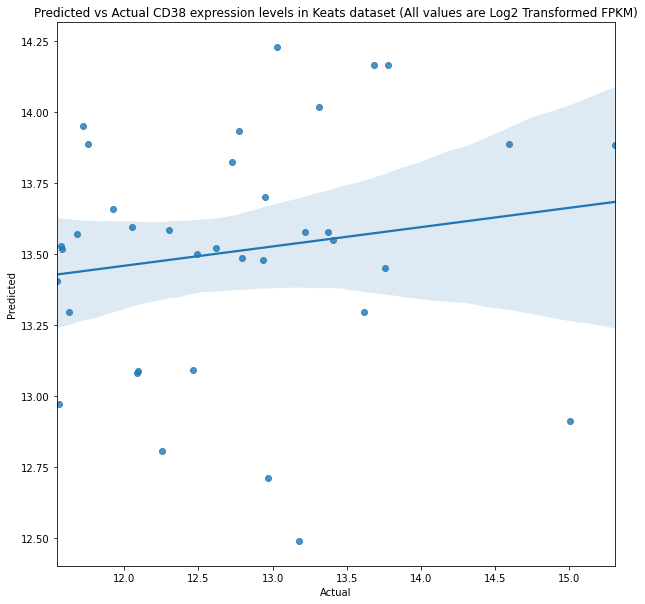

In [48]:
plt.figure(figsize=(10,10))

plt.title("Predicted vs Actual CD38 expression levels in Keats dataset (All values are Log2 Transformed FPKM)")

sns.regplot(x = y_cell_log[y_cell_log>=11.5], y = y_pred_cell.loc[y_cell_log[y_cell_log>=11.5].index])

plt.xlabel('Actual')

plt.ylabel('Predicted')

# plt.xlim(11.75, 16.9)

# plt.ylim(11.75, 16.9)

In [49]:
y_cell_log.index

Index(['ALMC1_DJ_p27', 'ALMC2_DJ_p11', 'AMO1_DSMZ_p8', 'ANBL6_DJ2_p13',
       'COLO677_DSMZ_p8', 'Delta47_JCRB_p16', 'DP6_DJ_p7', 'EJM_DSMZ_p9',
       'FLAM76_JCRB_p10', 'FR4_p6', 'H1112_p5', 'INA6_p5', 'JIM1_ECACC_p11',
       'JIM3_ECACC_p10', 'JJN3_DSMZ_p8', 'JK6L_p5', 'JMW1_PLB_p6',
       'Karpas25_ECACC_p8', 'Karpas417_ECACC_p12', 'Karpas620_DSMZ_p14',
       'Karpas929_ECACC_p10', 'Karpas929_ECACC_p15', 'KAS61_DJ_p5', 'KHM11_p7',
       'KHM1B_JCRB_p12', 'KMM1_JCRB_p13', 'KMS11_JCRB_Adh_p9',
       'KMS11_JCRB_Sus_p12', 'KMS12BM_JCRB_p9', 'KMS12PE_JCRB_p9', 'KMS18_p12',
       'KMS20_JCRB_p18', 'KMS21BM_JCRB_p10', 'KMS26_JCRB_p9', 'KMS27_JCRB_p8',
       'KMS28BM_JCRB_p9', 'KMS28PE_JCRB_p9', 'KMS34_JCRB_p10', 'KP6_DJ_p8',
       'L363_DSMZ_p8', 'LP1_DSMZ_p9', 'MM1R_ATCC_p7', 'MM1S_ATCC_p7',
       'MMM1_p5', 'MOLP2_DSMZ_p18', 'MOLP8_DSMZ_p9', 'NCIH929_DSMZ_p8',
       'OCIMY1_p6', 'OCIMY5_p10', 'OCIMY7_p8', 'OH2_PLB_p8', 'OPM1_p7',
       'OPM2_DSMZ_p9', 'PCM6_Riken_p6', 'PE1_

In [50]:
il6_dep = [
    'ALMC1_DJ_p27', 'ALMC2_DJ_p11', 'ANBL6_DJ2_p13', 'DP6_DJ_p7', 'INA6_p5', 'JK6L_p5', 'JMW1_PLB_p6',
    'KAS61_DJ_p5', 'KP6_DJ_p8', 'OH2_PLB_p8', 'PCM6_Riken_p6', 'PE2_PLB_p9', 'VP6_DJ_p5', 
    'XG1_p5', 'XG2_p5', 'XG6_p5', 'XG7_p6'
]

In [51]:
t10 = [
    'ANBL6_DJ2_p13', 'ALMC1_DJ_p27', 'MM1R_ATCC_p7', 'JK6L_p5', 'FLAM76_JCRB_p10',
    'ALMC2_DJ_p11', 'MM1S_ATCC_p7', 'DP6_DJ_p7', 'MOLP2_DSMZ_p18', 'Karpas25_ECACC_p8'
]

In [52]:
t15 = [
    'ANBL6_DJ2_p13', 'ALMC1_DJ_p27', 'MM1R_ATCC_p7', 'JK6L_p5', 'FLAM76_JCRB_p10',
    'ALMC2_DJ_p11', 'MM1S_ATCC_p7', 'DP6_DJ_p7', 'MOLP2_DSMZ_p18', 'Karpas25_ECACC_p8',
    'KMS34_JCRB_p10', 'KP6_DJ_p8', 'INA6_p5', 'KAS61_DJ_p5', 'OH2_PLB_p8'
]

In [53]:
y_cell_log.loc[il6_dep]

ALMC1_DJ_p27     12.947637
ALMC2_DJ_p11     12.051209
ANBL6_DJ2_p13    13.028079
DP6_DJ_p7        10.687376
INA6_p5          11.034111
JK6L_p5          12.303781
JMW1_PLB_p6      12.970106
KAS61_DJ_p5       6.491853
KP6_DJ_p8        11.624795
OH2_PLB_p8       12.616549
PCM6_Riken_p6    12.255324
PE2_PLB_p9        7.832890
VP6_DJ_p5        11.036860
XG1_p5           11.723234
XG2_p5           12.936454
XG6_p5            5.954196
XG7_p6           13.219320
Name: CD38, dtype: float64

Text(0, 0.5, 'Predicted')

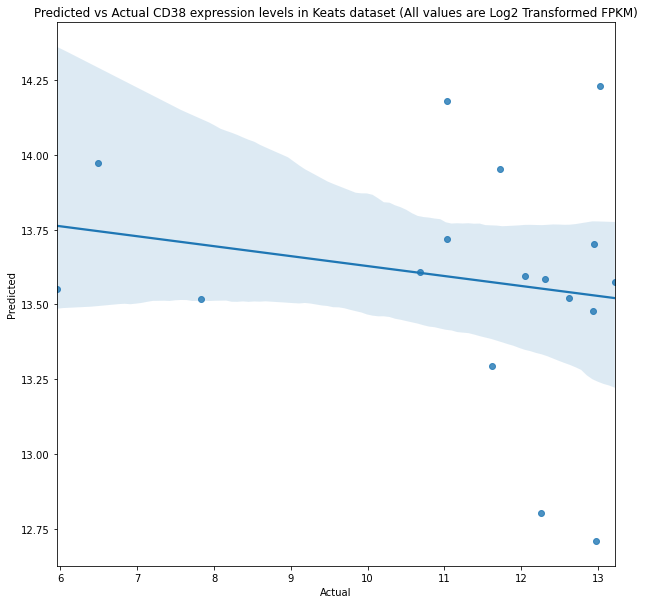

In [54]:
plt.figure(figsize=(10,10))

plt.title("Predicted vs Actual CD38 expression levels in Keats dataset (All values are Log2 Transformed FPKM)")

sns.regplot(x = y_cell_log.loc[il6_dep], y = y_pred_cell.loc[il6_dep])

plt.xlabel('Actual')

plt.ylabel('Predicted')

# plt.xlim(11.75, 16.9)

# plt.ylim(11.75, 16.9)

Text(0, 0.5, 'Predicted')

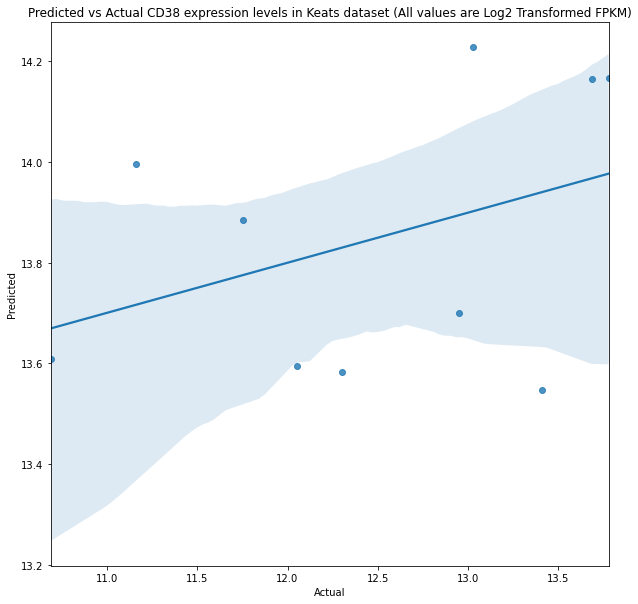

In [55]:
plt.figure(figsize=(10,10))

plt.title("Predicted vs Actual CD38 expression levels in Keats dataset (All values are Log2 Transformed FPKM)")

sns.regplot(x = y_cell_log.loc[t10], y = y_pred_cell.loc[t10])

plt.xlabel('Actual')

plt.ylabel('Predicted')

# plt.xlim(11.75, 16.9)

# plt.ylim(11.75, 16.9)

In [56]:
il6_dep[0] in y_cell_log.index

True

In [57]:
il6_bool = (y_cell_log.index.map(lambda x : x in il6_dep))

In [58]:
t15_bool = (y_cell_log.index.map(lambda x : x in t15))
t10_bool = (y_cell_log.index.map(lambda x : x in t10))

In [59]:
y_keats = y_cell_log.to_frame()

In [60]:
y_keats['pred'] = y_pred_cell

In [61]:
y_keats['il6'] = il6_bool

In [62]:
y_keats['t15'] = t15_bool

In [63]:
y_keats['t10'] = t10_bool

In [64]:
y_keats

,CD38,pred,il6,t15,t10
ALMC1_DJ_p27,12.947637,13.701261,True,True,True
ALMC2_DJ_p11,12.051209,13.594946,True,True,True
AMO1_DSMZ_p8,11.575066,13.527518,False,False,False
ANBL6_DJ2_p13,13.028079,14.228850,True,True,True
COLO677_DSMZ_p8,13.756139,13.450909,False,False,False
...,...,...,...,...,...
VP6_DJ_p5,11.036860,13.717602,True,False,False
XG1_p5,11.723234,13.951630,True,False,False
XG2_p5,12.936454,13.476795,True,False,False
XG6_p5,5.954196,13.550190,True,False,False


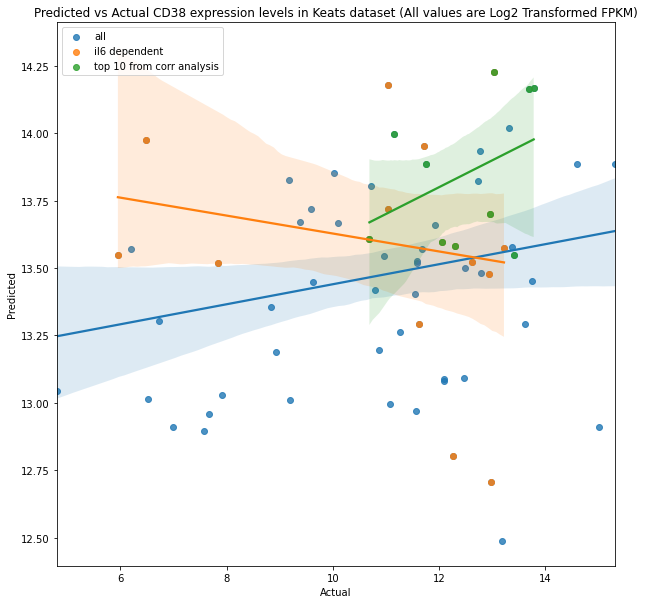

In [65]:
plt.figure(figsize=(10,10))

plt.title("Predicted vs Actual CD38 expression levels in Keats dataset (All values are Log2 Transformed FPKM)")

sns.regplot(x = y_keats.CD38, y = y_keats.pred, label = 'all')#, hue = 'il6', data = y_keats)
# sns.lmplot(x = 'CD38', y = 'pred', hue = 't15', data = y_keats)
sns.regplot(x = y_keats.CD38[y_keats.il6], y = y_keats.pred[y_keats.il6], label = 'il6 dependent')
sns.regplot(x = y_keats.CD38[y_keats.t10], y = y_keats.pred[y_keats.t10], label = 'top 10 from corr analysis')

plt.xlabel('Actual')

plt.ylabel('Predicted')

plt.legend()

# plt.xlim(5.5, 15)

# plt.ylim(12, 15)

In [66]:
# sns.regplot(x = y_keats.CD38, y = y_keats.pred)#, hue = 'il6', data = y_keats)
# sns.regplot(x = y_keats.CD38[y_keats.il6], y = y_keats.pred[y_keats.il6])
# sns.regplot(x = y_keats.CD38[y_keats.t15], y = y_keats.pred[y_keats.t15])

In [67]:
print(mean_squared_error(y_keats.CD38, y_keats.pred))
mean_squared_error(y_keats.CD38, y_keats.pred, squared = False)

11.328563190005106


3.3657930997025214

In [68]:
print(mean_squared_error(y_keats.CD38[y_keats.il6], y_keats.pred[y_keats.il6]))
mean_squared_error(y_keats.CD38[y_keats.il6], y_keats.pred[y_keats.il6], squared = False)

11.000564432055336


3.31670988059784

In [69]:
print(mean_squared_error(y_keats.CD38[y_keats.t10], y_keats.pred[y_keats.t10]))
mean_squared_error(y_keats.CD38[y_keats.t10], y_keats.pred[y_keats.t10], squared = False)

2.757335025623976


1.6605225158437256

In [70]:
import re

In [71]:
ccle = pd.read_csv('CCLE_RNAseq_genes_counts_20180929.csv')
ccle['Name'] = ccle.Name.map(lambda x : re.sub('\.\d+$', '', x))
ccle = ccle.set_index(ccle.Name)
ccle = ccle.drop(['Name', 'Description'], axis = 1)
ccle_hlt = ccle.loc[:,ccle.columns.map(lambda x : x.endswith('HAEMATOPOIETIC_AND_LYMPHOID_TISSUE'))]

In [72]:
ccle_hlt

,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BCP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BL70_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,SUPM2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SUPT11_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SUPT1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TALL1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TF1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,U266B1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972,7,5,10,9,11,16,15,7,4,6,...,6,13,8,11,17,4,11,18,4,18
ENSG00000227232,728,694,706,1122,1029,877,1292,1150,602,1067,...,885,888,921,739,1497,1476,1065,394,1726,562
ENSG00000243485,2,6,2,3,4,5,4,2,4,5,...,1,5,6,5,15,1,4,4,2,11
ENSG00000237613,3,0,3,3,3,3,2,2,6,1,...,2,6,7,7,10,0,5,4,1,14
ENSG00000268020,2,1,0,3,1,1,6,2,2,3,...,0,1,3,7,8,2,4,3,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,101470,187742,84071,155909,211553,163113,190759,206654,176456,200650,...,53617,186758,71400,47722,177037,164500,70621,32612,92178,64989
ENSG00000210194,24,32,17,23,214,42,28,27,136,32,...,4,35,15,32,25,23,13,10,9,13
ENSG00000198727,591424,544002,192466,542726,301832,431228,703234,472977,533862,694927,...,201380,208995,216005,112538,310258,187189,238408,65454,170690,90995


In [73]:
ccle_hlt_goi = ccle_hlt.loc[goi_id]

In [74]:
ccle_hlt_goi = ccle_hlt_goi.set_index(goi_names.GENE_NAMES)

In [75]:
ccle_hlt_goi.loc['CD38']

697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE          16602
A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE         1962
A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE       111290
ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE       29475
AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE        1377
                                                ...  
THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE          9239
TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE       60743
U266B1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE        2636
U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE          1818
WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     14469
Name: CD38, Length: 173, dtype: int64

In [76]:
y_cell_log

ALMC1_DJ_p27       12.947637
ALMC2_DJ_p11       12.051209
AMO1_DSMZ_p8       11.575066
ANBL6_DJ2_p13      13.028079
COLO677_DSMZ_p8    13.756139
                     ...    
VP6_DJ_p5          11.036860
XG1_p5             11.723234
XG2_p5             12.936454
XG6_p5              5.954196
XG7_p6             13.219320
Name: CD38, Length: 66, dtype: float64

In [77]:
X_ccle_hlt = np.log2(ccle_hlt_goi.drop('CD38').T)

In [78]:
y_ccle_hlt = np.log2(ccle_hlt_goi.loc['CD38'])

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [79]:
y_pred_ccle_hlt = xgb_model_f.predict(X_ccle_hlt)

In [80]:
ccle_pred_df = y_ccle_hlt.to_frame()

In [81]:
ccle_pred_df['pred'] = y_pred_ccle_hlt

In [82]:
ccle_pred_df = ccle_pred_df.replace(-np.inf, 0)

Text(0, 0.5, 'Predicted')

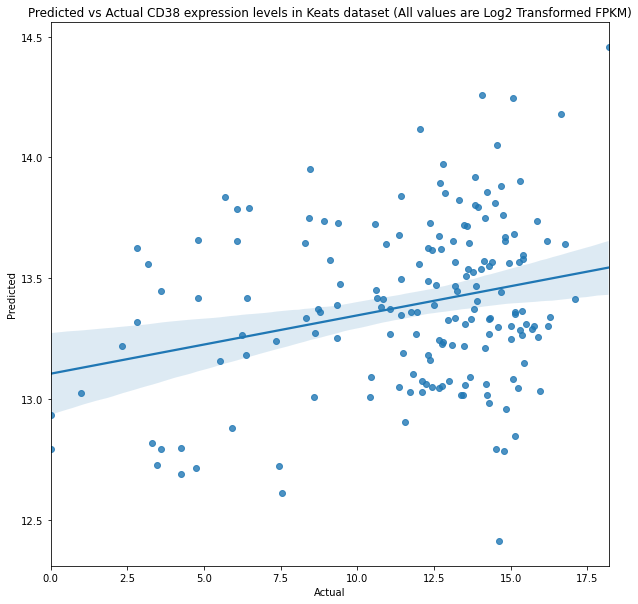

In [83]:
plt.figure(figsize=(10,10))

plt.title("Predicted vs Actual CD38 expression levels in Keats dataset (All values are Log2 Transformed FPKM)")

sns.regplot(x = ccle_pred_df.CD38, y = ccle_pred_df.pred)

plt.xlabel('Actual')

plt.ylabel('Predicted')

# plt.xlim(11.75, 16.9)

# plt.ylim(11.75, 16.9)

In [84]:
goi_cell_log.head()

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,NFKB1,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38
ALMC1_DJ_p27,10.103288,13.534546,13.746514,12.299780,11.675516,12.151968,13.493981,8.636625,11.868437,11.795634,...,11.976206,12.740202,10.584963,8.962896,11.384784,7.139551,0.0,4.087463,14.548641,12.947637
ALMC2_DJ_p11,11.408330,13.781052,13.918304,15.101360,11.735133,13.134426,13.713279,7.417853,12.459432,13.135068,...,12.527966,12.938109,9.634811,10.835261,11.474213,11.040290,0.0,4.643856,13.586019,12.051209
AMO1_DSMZ_p8,10.448116,12.187352,13.457381,15.175861,11.717248,12.416534,13.953833,9.712527,12.490099,10.107217,...,12.855258,12.848819,12.416534,11.033423,12.131535,8.134426,0.0,-inf,9.211888,11.575066
ANBL6_DJ2_p13,7.357552,13.221134,13.373409,12.416006,12.167104,12.987264,13.844804,6.820179,12.207014,12.052908,...,13.106236,12.501588,11.303781,12.244364,12.464801,12.632541,0.0,2.000000,14.763575,13.028079
COLO677_DSMZ_p8,11.359750,13.543998,14.028856,12.898979,10.759056,12.749450,13.726005,10.862637,12.760304,4.000000,...,12.904446,11.667555,10.792790,9.754888,12.297490,10.689124,-inf,9.812177,11.702173,13.756139


In [85]:
goi_pat_log

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,NFKB1,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38
MMRF_2801_1_BM,9.426265,11.168045,12.202124,9.511753,9.236014,10.743993,10.819381,16.477632,11.320236,11.084144,...,11.704336,12.610102,13.367551,4.169925,9.936638,10.284246,4.584963,8.124121,7.894818,13.648020
MMRF_2718_1_BM,10.933691,12.347345,13.077483,10.900112,10.958553,12.195987,12.305207,15.850089,12.589651,13.002639,...,12.543515,13.621365,14.659996,6.247928,10.053926,10.332037,4.584963,7.409391,8.741467,14.144340
MMRF_2815_1_BM,9.370687,12.350663,12.542065,9.774787,9.936638,10.981567,11.682995,12.476240,11.603163,12.479022,...,12.262095,12.911205,14.869015,4.087463,9.887221,10.820977,3.459432,7.149747,6.442943,13.451726
MMRF_1656_1_BM,11.709084,11.575066,12.055960,11.373953,9.912889,10.597121,11.789941,14.756713,10.854868,12.868437,...,10.714246,12.399011,13.372865,7.118941,10.000000,9.301496,2.000000,3.906891,9.675957,14.299566
MMRF_2461_1_BM,8.527477,13.006151,12.013672,10.048487,9.479780,10.745674,11.379378,16.489472,10.703904,12.750079,...,13.177887,13.626850,13.510270,3.459432,10.677720,10.834471,3.700440,12.835853,7.562242,13.172428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2795_1_BM,7.392317,11.437752,11.489848,8.535275,9.424166,9.583083,8.876517,13.768908,10.095397,10.820179,...,12.312599,12.788311,13.110646,7.741467,8.960002,7.209453,2.321928,7.348728,7.686501,11.976564
MMRF_2316_1_BM,10.273796,11.356452,11.817783,9.228819,10.133142,11.470659,11.113742,18.187168,10.590587,11.658211,...,10.849405,12.339572,12.836445,4.087463,9.118941,10.601771,1.000000,6.629357,6.169925,14.494106
MMRF_2440_1_BM,8.392317,12.066089,11.756973,9.729621,9.487840,10.306062,11.142745,16.080110,10.746514,11.577429,...,10.772315,12.901621,11.934059,3.000000,9.859535,8.640245,1.584963,4.169925,5.643856,14.941277
MMRF_2731_1_BM,11.167418,12.890264,12.616549,11.179287,10.153552,10.713387,12.386671,13.489597,11.100005,12.677499,...,12.550266,13.473579,14.295267,6.658211,10.625709,9.761551,3.807355,5.209453,7.569856,15.112847


In [86]:
goi_cell_log.describe()

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,NFKB1,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,9.617715,12.732651,13.286838,12.746359,11.330956,12.327052,13.380637,8.939084,11.893291,9.437823,...,12.108902,12.543442,11.255552,10.691441,11.582742,8.216728,-inf,-inf,10.878915,11.043286
std,2.161254,1.759472,0.529097,0.767896,0.707589,0.511801,0.472614,2.495562,0.513220,3.218072,...,0.847366,0.609034,1.275987,2.502097,0.577783,3.220319,NaN,NaN,2.546697,2.398651
min,3.700440,4.584963,12.235416,11.254438,9.924813,11.178042,12.364955,2.000000,10.868823,2.584963,...,10.421013,11.247334,7.554589,1.000000,9.804131,0.000000,-inf,-inf,1.000000,4.807355
25%,8.804921,12.515823,12.951931,12.196831,10.751538,11.934428,13.041740,7.167360,11.532596,7.002164,...,11.601867,12.242876,10.673969,10.240170,11.301604,6.871839,NaN,1.000000,9.566972,9.598939
50%,10.452752,13.018575,13.269709,12.788605,11.358897,12.355489,13.352832,9.088651,11.929811,10.494353,...,12.064514,12.565620,11.274316,11.356422,11.621345,8.851086,0.500000,5.768124,10.985438,11.577898
75%,11.051342,13.542091,13.706670,13.064760,11.758116,12.722380,13.712257,10.654187,12.201867,11.992725,...,12.657893,12.873219,12.077272,12.152620,11.942972,10.411212,1.584963,9.035782,12.590901,12.788072
max,12.136991,15.507640,14.636171,15.175861,13.008254,13.451726,14.708545,14.605364,13.012974,14.222644,...,15.522060,15.001144,15.063943,13.593158,12.935349,13.098526,8.169925,11.337622,15.111788,15.307770


In [87]:
goi_pat_log.describe()

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,NFKB1,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,...,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,9.586622,12.316654,11.982330,10.594031,10.139773,11.177667,11.721035,16.185024,11.070626,12.801230,...,11.520641,12.912519,12.915527,-inf,10.114286,9.544922,-inf,-inf,9.321444,14.127039
std,1.553188,0.710899,0.600234,0.867997,0.709600,0.707615,0.770381,1.518052,0.669364,0.915625,...,0.928599,0.535629,1.183332,NaN,0.700607,1.534178,NaN,NaN,2.360452,0.878690
min,3.169925,9.882643,9.854868,8.463524,6.629357,8.870365,8.876517,9.008429,8.577429,8.930737,...,9.269127,11.015415,9.321928,-inf,7.748193,1.000000,-inf,-inf,3.169925,9.586840
25%,8.592438,11.821375,11.561288,9.951284,9.681234,10.727920,11.205488,15.406716,10.612407,12.255912,...,10.899733,12.564029,12.170238,3.000000,9.643855,8.816984,2.321928,4.000000,7.592380,13.626051
50%,9.965784,12.346237,11.975848,10.552669,10.153552,11.173052,11.746094,16.448455,11.069450,12.847645,...,11.408860,12.927408,12.845882,4.807355,10.100662,9.731319,3.321928,5.523562,9.459432,14.147602
75%,10.696096,12.791060,12.387748,11.168337,10.652845,11.661778,12.241238,17.223082,11.519631,13.445532,...,12.023581,13.268030,13.610676,7.214246,10.542548,10.553628,4.321928,7.262087,11.045076,14.701875
max,12.680360,15.122990,14.112440,13.956830,12.223097,13.501340,14.385862,19.787141,13.234219,15.412801,...,15.999736,14.998017,16.855538,13.403412,12.771283,13.807757,9.656425,13.005975,15.269857,16.776562


In [88]:
goi_cell_log.describe().loc['50%']

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


GENE_NAMES
NFIC     10.452752
IKZF1    13.018575
YY1      13.269709
ARNT     12.788605
NFYB     11.358897
           ...    
STAT4     8.851086
GATA1     0.500000
ETS2      5.768124
ETS1     10.985438
CD38     11.577898
Name: 50%, Length: 110, dtype: float64

In [89]:
goi_pat_log.describe().loc['50%']

GENE_NAMES
NFIC      9.965784
IKZF1    12.346237
YY1      11.975848
ARNT     10.552669
NFYB     10.153552
           ...    
STAT4     9.731319
GATA1     3.321928
ETS2      5.523562
ETS1      9.459432
CD38     14.147602
Name: 50%, Length: 110, dtype: float64

In [90]:
goi_cell_log.head()

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,NFKB1,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38
ALMC1_DJ_p27,10.103288,13.534546,13.746514,12.299780,11.675516,12.151968,13.493981,8.636625,11.868437,11.795634,...,11.976206,12.740202,10.584963,8.962896,11.384784,7.139551,0.0,4.087463,14.548641,12.947637
ALMC2_DJ_p11,11.408330,13.781052,13.918304,15.101360,11.735133,13.134426,13.713279,7.417853,12.459432,13.135068,...,12.527966,12.938109,9.634811,10.835261,11.474213,11.040290,0.0,4.643856,13.586019,12.051209
AMO1_DSMZ_p8,10.448116,12.187352,13.457381,15.175861,11.717248,12.416534,13.953833,9.712527,12.490099,10.107217,...,12.855258,12.848819,12.416534,11.033423,12.131535,8.134426,0.0,-inf,9.211888,11.575066
ANBL6_DJ2_p13,7.357552,13.221134,13.373409,12.416006,12.167104,12.987264,13.844804,6.820179,12.207014,12.052908,...,13.106236,12.501588,11.303781,12.244364,12.464801,12.632541,0.0,2.000000,14.763575,13.028079
COLO677_DSMZ_p8,11.359750,13.543998,14.028856,12.898979,10.759056,12.749450,13.726005,10.862637,12.760304,4.000000,...,12.904446,11.667555,10.792790,9.754888,12.297490,10.689124,-inf,9.812177,11.702173,13.756139


In [91]:
goi_pat_log.head()

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,NFKB1,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38
MMRF_2801_1_BM,9.426265,11.168045,12.202124,9.511753,9.236014,10.743993,10.819381,16.477632,11.320236,11.084144,...,11.704336,12.610102,13.367551,4.169925,9.936638,10.284246,4.584963,8.124121,7.894818,13.648020
MMRF_2718_1_BM,10.933691,12.347345,13.077483,10.900112,10.958553,12.195987,12.305207,15.850089,12.589651,13.002639,...,12.543515,13.621365,14.659996,6.247928,10.053926,10.332037,4.584963,7.409391,8.741467,14.144340
MMRF_2815_1_BM,9.370687,12.350663,12.542065,9.774787,9.936638,10.981567,11.682995,12.476240,11.603163,12.479022,...,12.262095,12.911205,14.869015,4.087463,9.887221,10.820977,3.459432,7.149747,6.442943,13.451726
MMRF_1656_1_BM,11.709084,11.575066,12.055960,11.373953,9.912889,10.597121,11.789941,14.756713,10.854868,12.868437,...,10.714246,12.399011,13.372865,7.118941,10.000000,9.301496,2.000000,3.906891,9.675957,14.299566
MMRF_2461_1_BM,8.527477,13.006151,12.013672,10.048487,9.479780,10.745674,11.379378,16.489472,10.703904,12.750079,...,13.177887,13.626850,13.510270,3.459432,10.677720,10.834471,3.700440,12.835853,7.562242,13.172428


In [92]:
sum(goi_cell_log.applymap(lambda x : np.isfinite(x)).describe().loc['unique'])

133

In [93]:
sum(goi_pat_log.applymap(lambda x : np.isfinite(x)).describe().loc['unique'])

140

In [94]:
goi_pat_log['corp'] = 'pat'
goi_pat_log = goi_pat_log.replace(-np.inf, 0)
goi_cell_log['corp'] = 'cell'
goi_cell_log = goi_cell_log.replace(-np.inf, 0)

In [95]:
goi_pat_log

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38,corp
MMRF_2801_1_BM,9.426265,11.168045,12.202124,9.511753,9.236014,10.743993,10.819381,16.477632,11.320236,11.084144,...,12.610102,13.367551,4.169925,9.936638,10.284246,4.584963,8.124121,7.894818,13.648020,pat
MMRF_2718_1_BM,10.933691,12.347345,13.077483,10.900112,10.958553,12.195987,12.305207,15.850089,12.589651,13.002639,...,13.621365,14.659996,6.247928,10.053926,10.332037,4.584963,7.409391,8.741467,14.144340,pat
MMRF_2815_1_BM,9.370687,12.350663,12.542065,9.774787,9.936638,10.981567,11.682995,12.476240,11.603163,12.479022,...,12.911205,14.869015,4.087463,9.887221,10.820977,3.459432,7.149747,6.442943,13.451726,pat
MMRF_1656_1_BM,11.709084,11.575066,12.055960,11.373953,9.912889,10.597121,11.789941,14.756713,10.854868,12.868437,...,12.399011,13.372865,7.118941,10.000000,9.301496,2.000000,3.906891,9.675957,14.299566,pat
MMRF_2461_1_BM,8.527477,13.006151,12.013672,10.048487,9.479780,10.745674,11.379378,16.489472,10.703904,12.750079,...,13.626850,13.510270,3.459432,10.677720,10.834471,3.700440,12.835853,7.562242,13.172428,pat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2795_1_BM,7.392317,11.437752,11.489848,8.535275,9.424166,9.583083,8.876517,13.768908,10.095397,10.820179,...,12.788311,13.110646,7.741467,8.960002,7.209453,2.321928,7.348728,7.686501,11.976564,pat
MMRF_2316_1_BM,10.273796,11.356452,11.817783,9.228819,10.133142,11.470659,11.113742,18.187168,10.590587,11.658211,...,12.339572,12.836445,4.087463,9.118941,10.601771,1.000000,6.629357,6.169925,14.494106,pat
MMRF_2440_1_BM,8.392317,12.066089,11.756973,9.729621,9.487840,10.306062,11.142745,16.080110,10.746514,11.577429,...,12.901621,11.934059,3.000000,9.859535,8.640245,1.584963,4.169925,5.643856,14.941277,pat
MMRF_2731_1_BM,11.167418,12.890264,12.616549,11.179287,10.153552,10.713387,12.386671,13.489597,11.100005,12.677499,...,13.473579,14.295267,6.658211,10.625709,9.761551,3.807355,5.209453,7.569856,15.112847,pat


In [96]:
goi_cell_log

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38,corp
ALMC1_DJ_p27,10.103288,13.534546,13.746514,12.299780,11.675516,12.151968,13.493981,8.636625,11.868437,11.795634,...,12.740202,10.584963,8.962896,11.384784,7.139551,0.000000,4.087463,14.548641,12.947637,cell
ALMC2_DJ_p11,11.408330,13.781052,13.918304,15.101360,11.735133,13.134426,13.713279,7.417853,12.459432,13.135068,...,12.938109,9.634811,10.835261,11.474213,11.040290,0.000000,4.643856,13.586019,12.051209,cell
AMO1_DSMZ_p8,10.448116,12.187352,13.457381,15.175861,11.717248,12.416534,13.953833,9.712527,12.490099,10.107217,...,12.848819,12.416534,11.033423,12.131535,8.134426,0.000000,0.000000,9.211888,11.575066,cell
ANBL6_DJ2_p13,7.357552,13.221134,13.373409,12.416006,12.167104,12.987264,13.844804,6.820179,12.207014,12.052908,...,12.501588,11.303781,12.244364,12.464801,12.632541,0.000000,2.000000,14.763575,13.028079,cell
COLO677_DSMZ_p8,11.359750,13.543998,14.028856,12.898979,10.759056,12.749450,13.726005,10.862637,12.760304,4.000000,...,11.667555,10.792790,9.754888,12.297490,10.689124,0.000000,9.812177,11.702173,13.756139,cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VP6_DJ_p5,11.464546,13.935441,12.855258,12.782998,11.101319,12.911579,12.650603,5.285402,12.228819,11.363040,...,11.606868,13.132339,13.081317,11.855647,5.169925,1.584963,2.807355,14.452370,11.036860,cell
XG1_p5,5.807355,12.992584,13.194757,12.007728,12.325024,12.418380,13.319390,8.098032,11.835656,12.649032,...,12.746514,11.800091,11.750288,12.709945,9.501837,2.321928,0.000000,9.226412,11.723234,cell
XG2_p5,11.310613,13.737247,13.764664,12.980318,12.230020,12.923699,13.410319,10.401946,11.989749,11.733439,...,12.682995,13.153552,12.683433,11.939212,7.948367,0.000000,0.000000,8.164907,12.936454,cell
XG6_p5,4.754888,12.325305,13.163021,12.273796,10.702173,12.721099,13.287712,9.751544,11.524052,14.222644,...,12.890834,11.245553,8.588715,11.839991,11.598983,3.459432,1.000000,11.853310,5.954196,cell


In [97]:
goi_pat_log.merge(goi_cell_log,how = 'outer')

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38,corp
0,9.426265,11.168045,12.202124,9.511753,9.236014,10.743993,10.819381,16.477632,11.320236,11.084144,...,12.610102,13.367551,4.169925,9.936638,10.284246,4.584963,8.124121,7.894818,13.648020,pat
1,10.933691,12.347345,13.077483,10.900112,10.958553,12.195987,12.305207,15.850089,12.589651,13.002639,...,13.621365,14.659996,6.247928,10.053926,10.332037,4.584963,7.409391,8.741467,14.144340,pat
2,9.370687,12.350663,12.542065,9.774787,9.936638,10.981567,11.682995,12.476240,11.603163,12.479022,...,12.911205,14.869015,4.087463,9.887221,10.820977,3.459432,7.149747,6.442943,13.451726,pat
3,11.709084,11.575066,12.055960,11.373953,9.912889,10.597121,11.789941,14.756713,10.854868,12.868437,...,12.399011,13.372865,7.118941,10.000000,9.301496,2.000000,3.906891,9.675957,14.299566,pat
4,8.527477,13.006151,12.013672,10.048487,9.479780,10.745674,11.379378,16.489472,10.703904,12.750079,...,13.626850,13.510270,3.459432,10.677720,10.834471,3.700440,12.835853,7.562242,13.172428,pat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,11.464546,13.935441,12.855258,12.782998,11.101319,12.911579,12.650603,5.285402,12.228819,11.363040,...,11.606868,13.132339,13.081317,11.855647,5.169925,1.584963,2.807355,14.452370,11.036860,cell
829,5.807355,12.992584,13.194757,12.007728,12.325024,12.418380,13.319390,8.098032,11.835656,12.649032,...,12.746514,11.800091,11.750288,12.709945,9.501837,2.321928,0.000000,9.226412,11.723234,cell
830,11.310613,13.737247,13.764664,12.980318,12.230020,12.923699,13.410319,10.401946,11.989749,11.733439,...,12.682995,13.153552,12.683433,11.939212,7.948367,0.000000,0.000000,8.164907,12.936454,cell
831,4.754888,12.325305,13.163021,12.273796,10.702173,12.721099,13.287712,9.751544,11.524052,14.222644,...,12.890834,11.245553,8.588715,11.839991,11.598983,3.459432,1.000000,11.853310,5.954196,cell


In [98]:
tips = sns.load_dataset("tips")

In [99]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [100]:
goi_pat_log.merge(goi_cell_log,how = 'outer').describe()

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,NFKB1,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,...,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,9.589086,12.349614,12.085688,10.764564,10.234152,11.268735,11.852528,15.610916,11.135807,12.534742,...,11.567250,12.883276,12.784005,5.550693,10.230634,9.439687,3.134611,5.590856,9.444845,13.882708
std,1.608111,0.848400,0.691281,1.038310,0.778682,0.760235,0.874663,2.538342,0.694635,1.551519,...,0.935556,0.550516,1.271873,3.367674,0.797181,1.762394,1.817824,2.637426,2.411144,1.361960
min,3.169925,4.584963,9.854868,8.463524,6.629357,8.870365,8.876517,2.000000,8.577429,2.584963,...,9.269127,11.015415,7.554589,0.000000,7.748193,0.000000,0.000000,0.000000,1.000000,4.807355
25%,8.625709,11.848232,11.582612,10.005625,9.712527,10.763212,11.257388,15.013933,10.657318,12.087131,...,10.952741,12.536490,12.014369,3.000000,9.675957,8.731319,2.000000,3.906891,7.721099,13.478896
50%,9.991522,12.384514,12.048827,10.652845,10.207014,11.234817,11.835656,16.245163,11.150382,12.782589,...,11.465056,12.903694,12.760928,5.044394,10.173677,9.715962,3.169925,5.523562,9.554589,14.078735
75%,10.747354,12.859923,12.511753,11.356452,10.738937,11.758223,12.417061,17.159457,11.620220,13.411776,...,12.081816,13.236463,13.555068,8.060696,10.696098,10.551708,4.169925,7.339850,11.214319,14.643518
max,12.680360,15.507640,14.636171,15.175861,13.008254,13.501340,14.708545,19.787141,13.234219,15.412801,...,15.999736,15.001144,16.855538,13.593158,12.935349,13.807757,9.656425,13.005975,15.269857,16.776562


In [101]:
10.747354-8.625709

2.121644999999999

In [102]:
goi_pat_log.merge(goi_cell_log,how = 'outer').describe().loc['75%']-goi_pat_log.merge(goi_cell_log,how = 'outer').describe().loc['25%']

GENE_NAMES
NFIC     2.121645
IKZF1    1.011691
YY1      0.929140
ARNT     1.350827
NFYB     1.026410
           ...   
STAT4    1.820389
GATA1    2.169925
ETS2     3.432959
ETS1     3.493220
CD38     1.164622
Length: 110, dtype: float64

In [103]:
goi_pat_log.merge(goi_cell_log,how = 'outer')

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38,corp
0,9.426265,11.168045,12.202124,9.511753,9.236014,10.743993,10.819381,16.477632,11.320236,11.084144,...,12.610102,13.367551,4.169925,9.936638,10.284246,4.584963,8.124121,7.894818,13.648020,pat
1,10.933691,12.347345,13.077483,10.900112,10.958553,12.195987,12.305207,15.850089,12.589651,13.002639,...,13.621365,14.659996,6.247928,10.053926,10.332037,4.584963,7.409391,8.741467,14.144340,pat
2,9.370687,12.350663,12.542065,9.774787,9.936638,10.981567,11.682995,12.476240,11.603163,12.479022,...,12.911205,14.869015,4.087463,9.887221,10.820977,3.459432,7.149747,6.442943,13.451726,pat
3,11.709084,11.575066,12.055960,11.373953,9.912889,10.597121,11.789941,14.756713,10.854868,12.868437,...,12.399011,13.372865,7.118941,10.000000,9.301496,2.000000,3.906891,9.675957,14.299566,pat
4,8.527477,13.006151,12.013672,10.048487,9.479780,10.745674,11.379378,16.489472,10.703904,12.750079,...,13.626850,13.510270,3.459432,10.677720,10.834471,3.700440,12.835853,7.562242,13.172428,pat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,11.464546,13.935441,12.855258,12.782998,11.101319,12.911579,12.650603,5.285402,12.228819,11.363040,...,11.606868,13.132339,13.081317,11.855647,5.169925,1.584963,2.807355,14.452370,11.036860,cell
829,5.807355,12.992584,13.194757,12.007728,12.325024,12.418380,13.319390,8.098032,11.835656,12.649032,...,12.746514,11.800091,11.750288,12.709945,9.501837,2.321928,0.000000,9.226412,11.723234,cell
830,11.310613,13.737247,13.764664,12.980318,12.230020,12.923699,13.410319,10.401946,11.989749,11.733439,...,12.682995,13.153552,12.683433,11.939212,7.948367,0.000000,0.000000,8.164907,12.936454,cell
831,4.754888,12.325305,13.163021,12.273796,10.702173,12.721099,13.287712,9.751544,11.524052,14.222644,...,12.890834,11.245553,8.588715,11.839991,11.598983,3.459432,1.000000,11.853310,5.954196,cell


In [104]:
# plt.figure(figsize=(19,11))


# sns.barplot(data=goi_pat_log.merge(goi_cell_log,how = 'outer'), hue = 'corp')

In [105]:
goi_pat_log.merge(goi_cell_log,how = 'outer')

GENE_NAMES,NFIC,IKZF1,YY1,ARNT,NFYB,ATF2,SP1,FOS,CREB1,POU2F2,...,USF2,IRF1,LEF1,ELK1,STAT4,GATA1,ETS2,ETS1,CD38,corp
0,9.426265,11.168045,12.202124,9.511753,9.236014,10.743993,10.819381,16.477632,11.320236,11.084144,...,12.610102,13.367551,4.169925,9.936638,10.284246,4.584963,8.124121,7.894818,13.648020,pat
1,10.933691,12.347345,13.077483,10.900112,10.958553,12.195987,12.305207,15.850089,12.589651,13.002639,...,13.621365,14.659996,6.247928,10.053926,10.332037,4.584963,7.409391,8.741467,14.144340,pat
2,9.370687,12.350663,12.542065,9.774787,9.936638,10.981567,11.682995,12.476240,11.603163,12.479022,...,12.911205,14.869015,4.087463,9.887221,10.820977,3.459432,7.149747,6.442943,13.451726,pat
3,11.709084,11.575066,12.055960,11.373953,9.912889,10.597121,11.789941,14.756713,10.854868,12.868437,...,12.399011,13.372865,7.118941,10.000000,9.301496,2.000000,3.906891,9.675957,14.299566,pat
4,8.527477,13.006151,12.013672,10.048487,9.479780,10.745674,11.379378,16.489472,10.703904,12.750079,...,13.626850,13.510270,3.459432,10.677720,10.834471,3.700440,12.835853,7.562242,13.172428,pat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,11.464546,13.935441,12.855258,12.782998,11.101319,12.911579,12.650603,5.285402,12.228819,11.363040,...,11.606868,13.132339,13.081317,11.855647,5.169925,1.584963,2.807355,14.452370,11.036860,cell
829,5.807355,12.992584,13.194757,12.007728,12.325024,12.418380,13.319390,8.098032,11.835656,12.649032,...,12.746514,11.800091,11.750288,12.709945,9.501837,2.321928,0.000000,9.226412,11.723234,cell
830,11.310613,13.737247,13.764664,12.980318,12.230020,12.923699,13.410319,10.401946,11.989749,11.733439,...,12.682995,13.153552,12.683433,11.939212,7.948367,0.000000,0.000000,8.164907,12.936454,cell
831,4.754888,12.325305,13.163021,12.273796,10.702173,12.721099,13.287712,9.751544,11.524052,14.222644,...,12.890834,11.245553,8.588715,11.839991,11.598983,3.459432,1.000000,11.853310,5.954196,cell


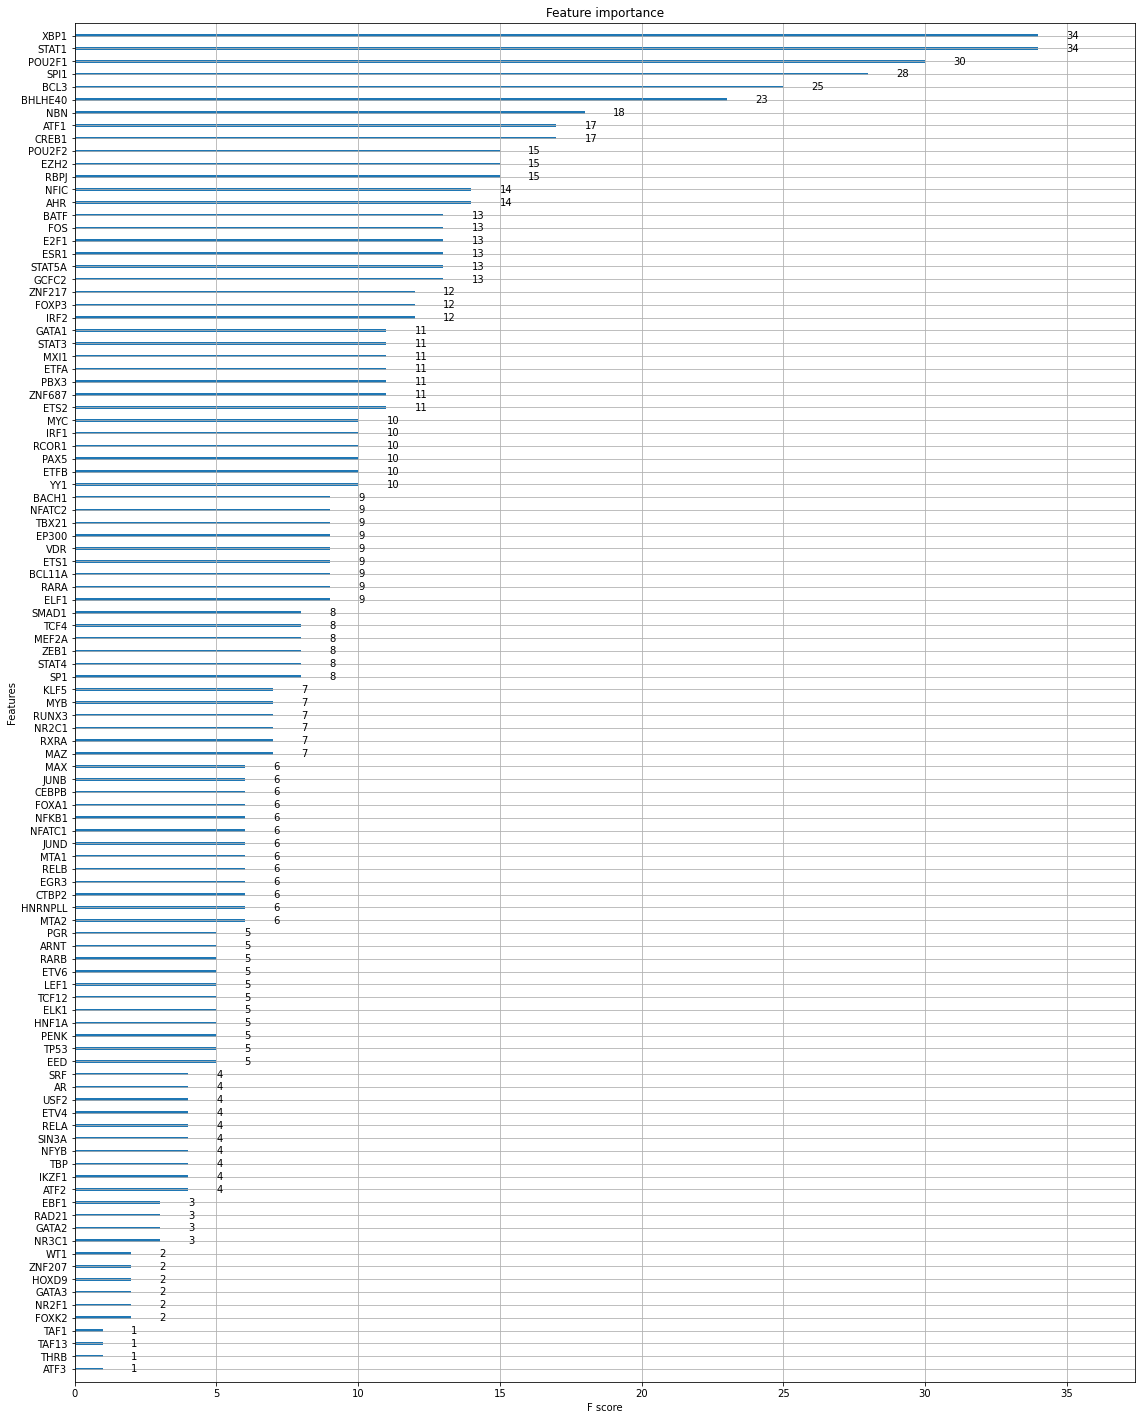

In [106]:
ax = xgb.plot_importance(xgb_model_f)
fig = ax.figure
fig.set_size_inches(19, 25)

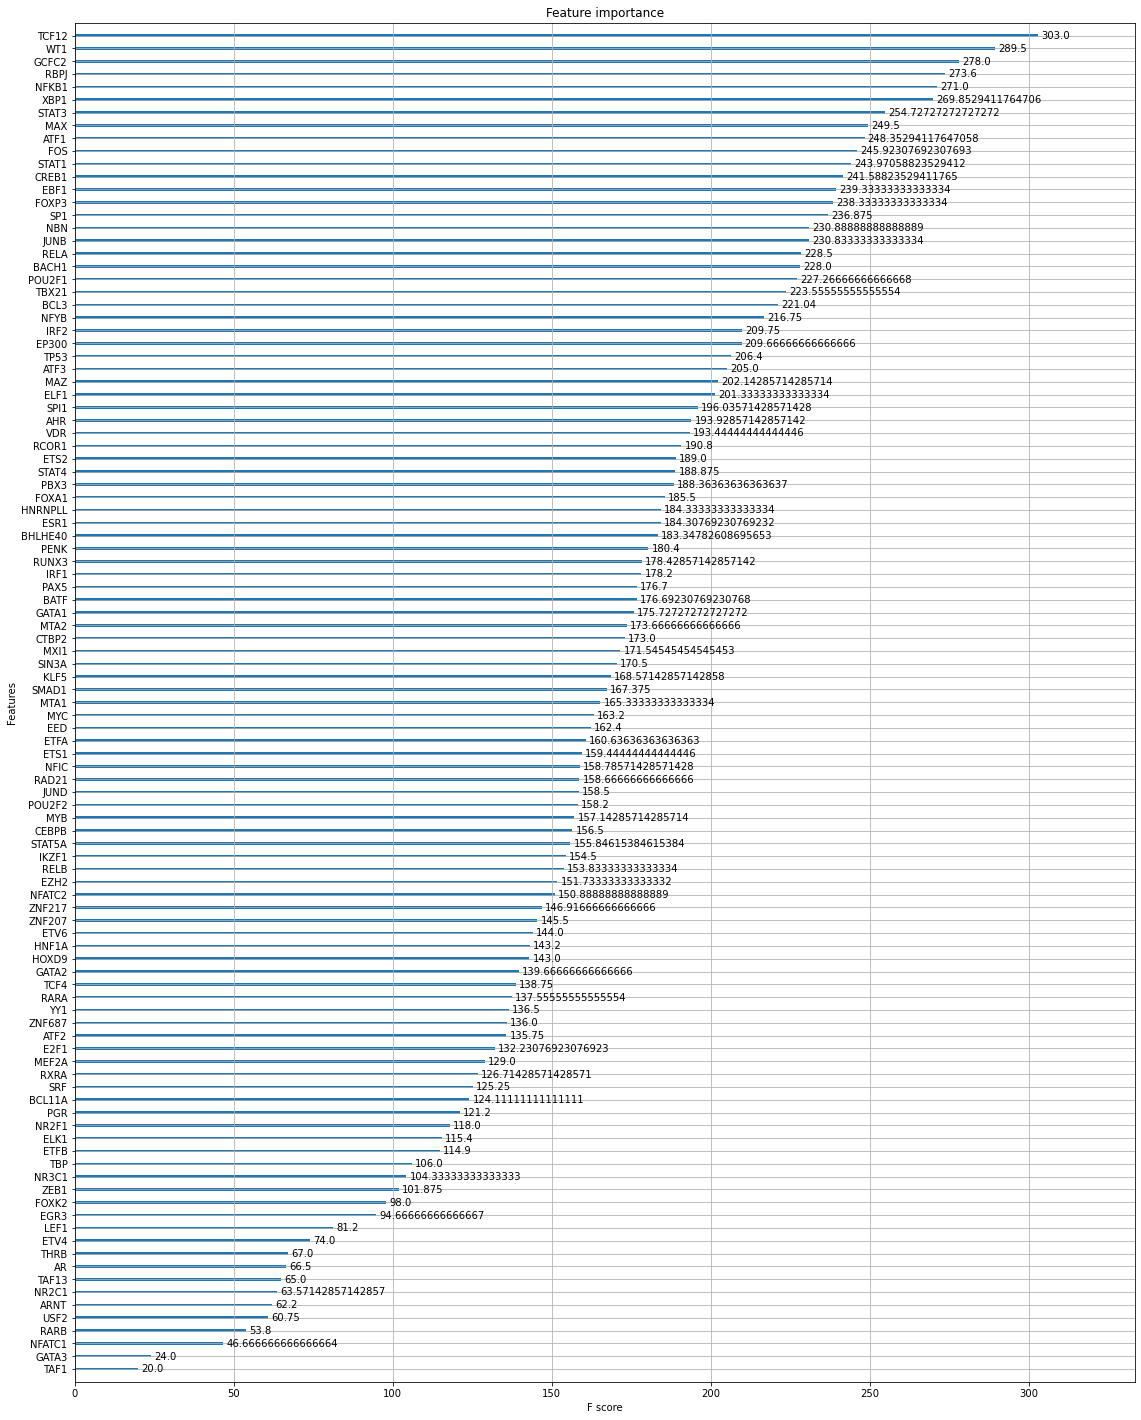

In [107]:
ax = xgb.plot_importance(xgb_model_f, importance_type = 'cover')
fig = ax.figure
fig.set_size_inches(19, 25)

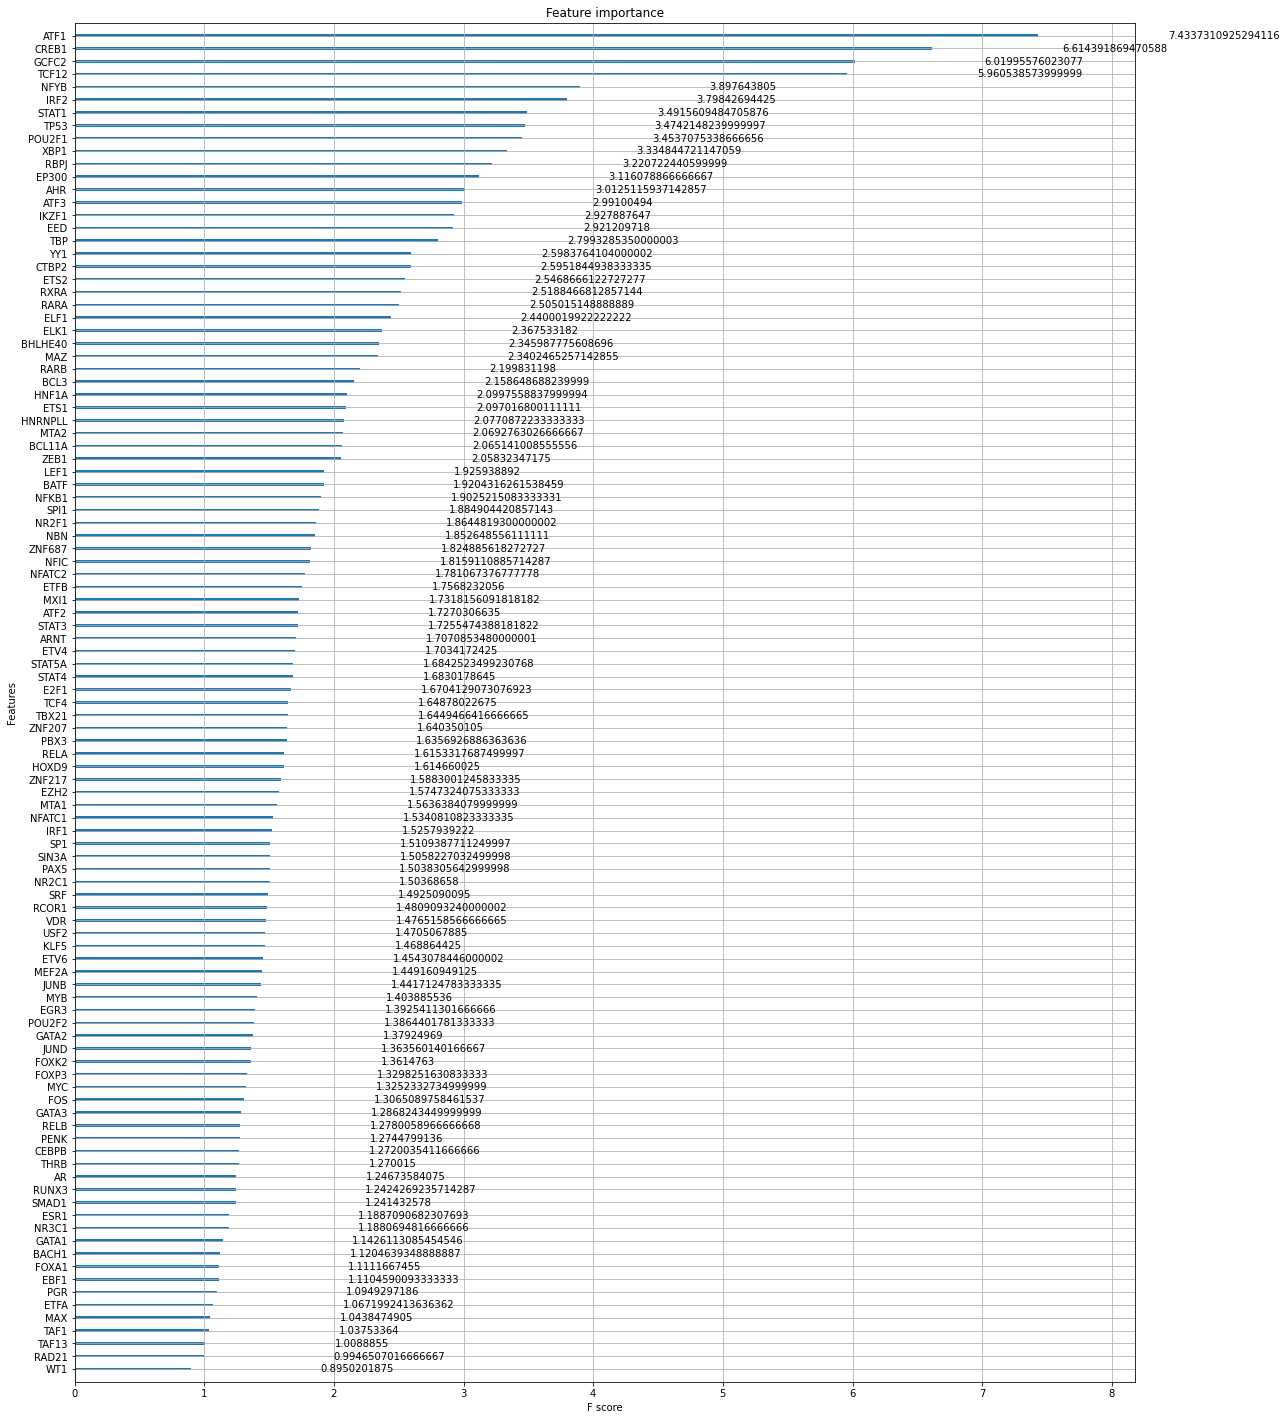

In [108]:
ax = xgb.plot_importance(xgb_model_f, importance_type = 'gain')
fig = ax.figure
fig.set_size_inches(19, 25)
#ATF1, CREB1, GCFC2, TCF12

In [109]:
X_log_train.loc[:,['ATF1', 'CREB1', 'GCFC2', 'TCF12']]

GENE_NAMES,ATF1,CREB1,GCFC2,TCF12
MMRF_1371_1_BM,8.936638,10.086136,8.682995,11.594325
MMRF_2689_1_BM,8.584963,10.476746,7.794416,11.994000
MMRF_2622_1_BM,10.571753,11.998943,10.045760,12.292897
MMRF_1470_1_BM,10.047124,11.684749,9.499846,12.265615
MMRF_2505_1_BM,10.284246,10.684749,9.139551,11.606868
...,...,...,...,...
MMRF_1450_1_BM,10.048487,11.006326,10.032046,11.988330
MMRF_2832_1_BM,8.741467,11.441907,7.375039,11.494356
MMRF_1715_1_BM,10.012625,10.703904,10.041659,11.750288
MMRF_2475_1_BM,10.034799,11.323055,9.779719,12.410981


Text(0, 0.5, 'Predicted')

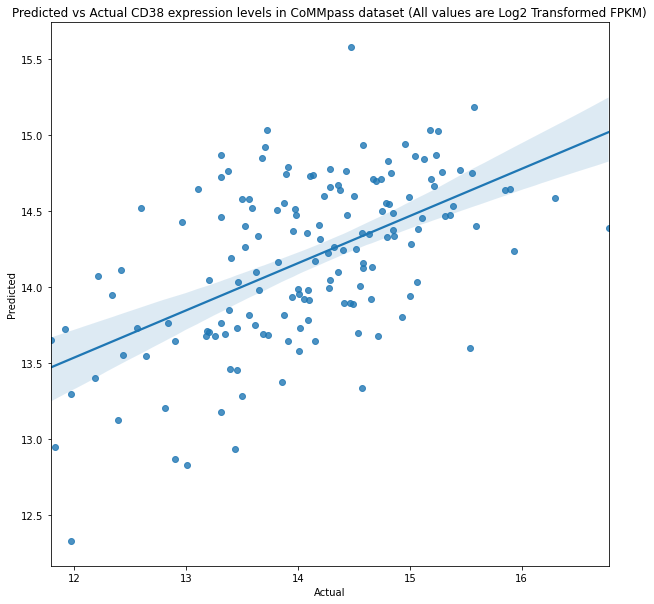

In [110]:
xgb_model_f2 = xgb.XGBRegressor(
    colsample_bylevel = 0.6193383338859322, colsample_bynode = 0.7285300271036474, 
    colsample_bytree = 0.8389296048351383, gamma = 0.9164228236791261, n_jobs = -1, random_state = 42,
    learning_rate = 0.055646060612889785, max_depth = 4, n_estimators = 163, subsample = 0.6204024819228363
)

xgb_model_f2.fit(X_log_train.loc[:,['ATF1', 'CREB1', 'GCFC2', 'TCF12']], y_log_train)

y_pred2 = xgb_model_f2.predict(X_log_test.loc[:,['ATF1', 'CREB1', 'GCFC2', 'TCF12']])

y_pred2 = pd.Series(y_pred2, index = y_log_test.index)

plt.figure(figsize=(10,10))

plt.title("Predicted vs Actual CD38 expression levels in CoMMpass dataset (All values are Log2 Transformed FPKM)")

sns.regplot(x = y_log_test, y = y_pred2)

plt.xlabel('Actual')

plt.ylabel('Predicted')

# plt.xlim(11.75, 16.9)

# plt.ylim(11.75, 16.9)

In [111]:
mean_squared_error(y_log_test, y_pred2)#, squared = False)

0.6428010735479497

In [112]:
mean_squared_error(y_log_test, y_pred2, squared = False)

0.801748759617344

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1368x1800 with 0 Axes>

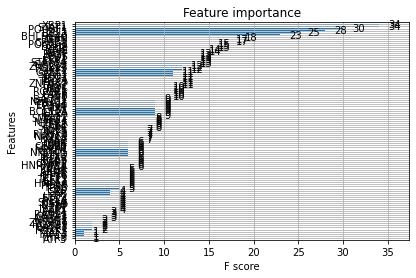

In [113]:
plt.figure(figsize=(19,25))

xgb.plot_importance(xgb_model_f)

In [114]:
g = sns.FacetGrid()#goi_pat_log.merge(goi_cell_log,how = 'outer'), col="corp")


g.map(goi_pat_log.drop('corp', axis = 1), goi_pat_log.drop('corp', axis = 1), orient = 'h')

TypeError: __init__() missing 1 required positional argument: 'data'

<AxesSubplot:ylabel='GENE_NAMES'>

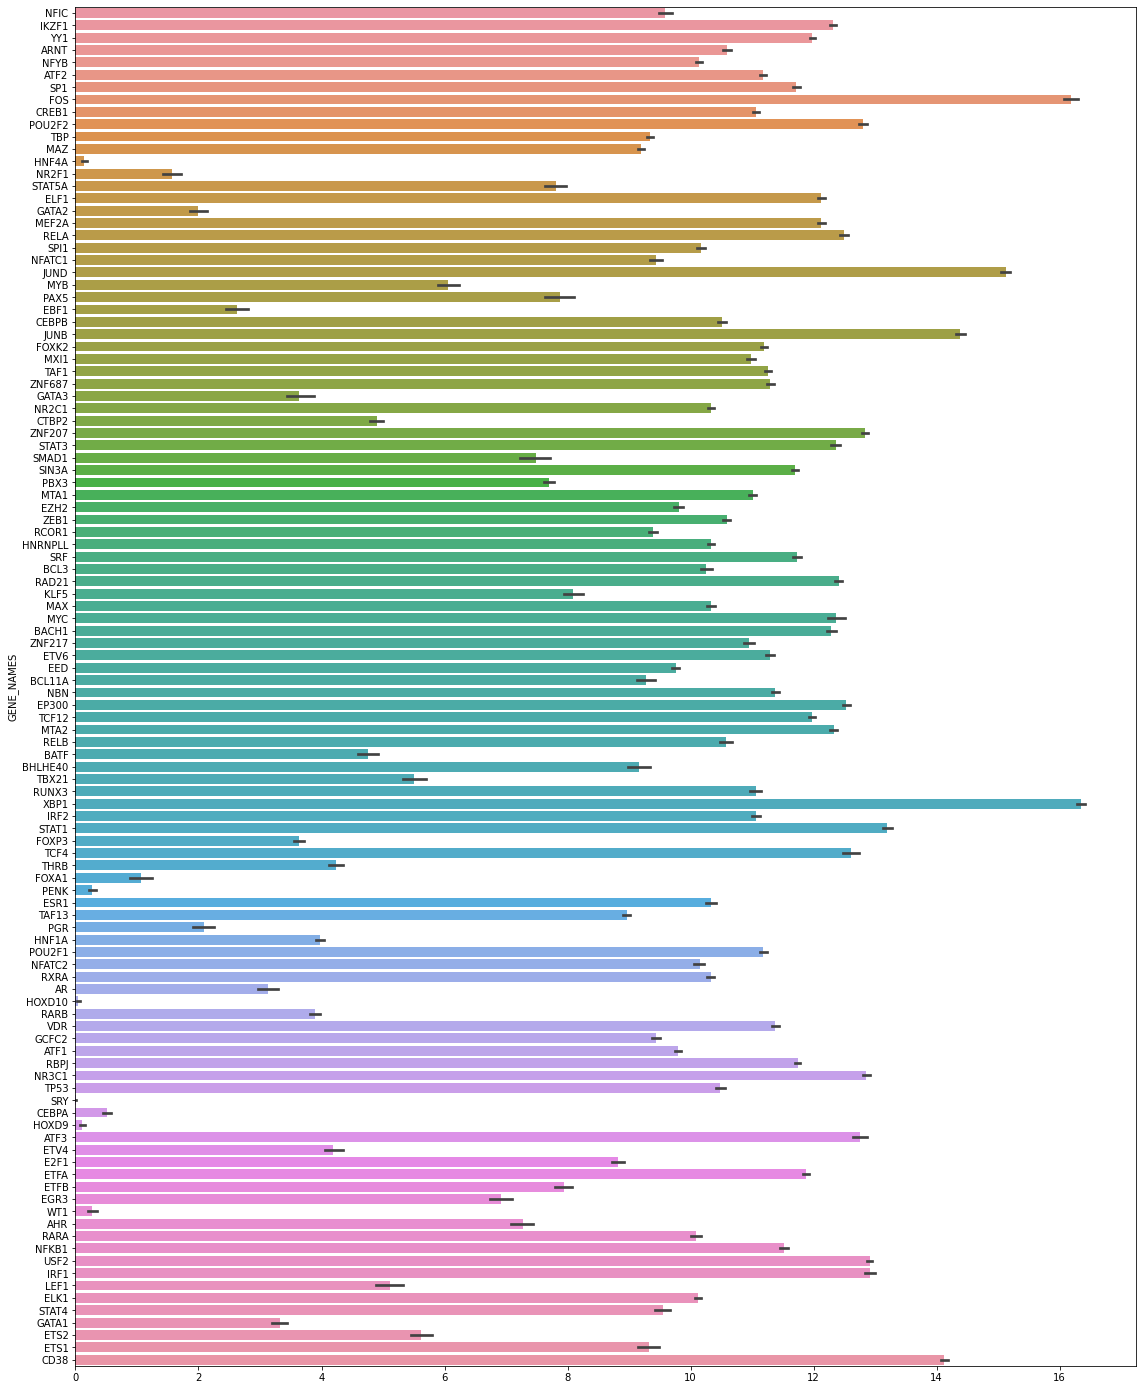

In [115]:
plt.figure(figsize=(19,25))

sns.barplot(data=goi_pat_log.drop('corp', axis = 1), orient = 'h')#, hue = 'corp')

<AxesSubplot:ylabel='GENE_NAMES'>

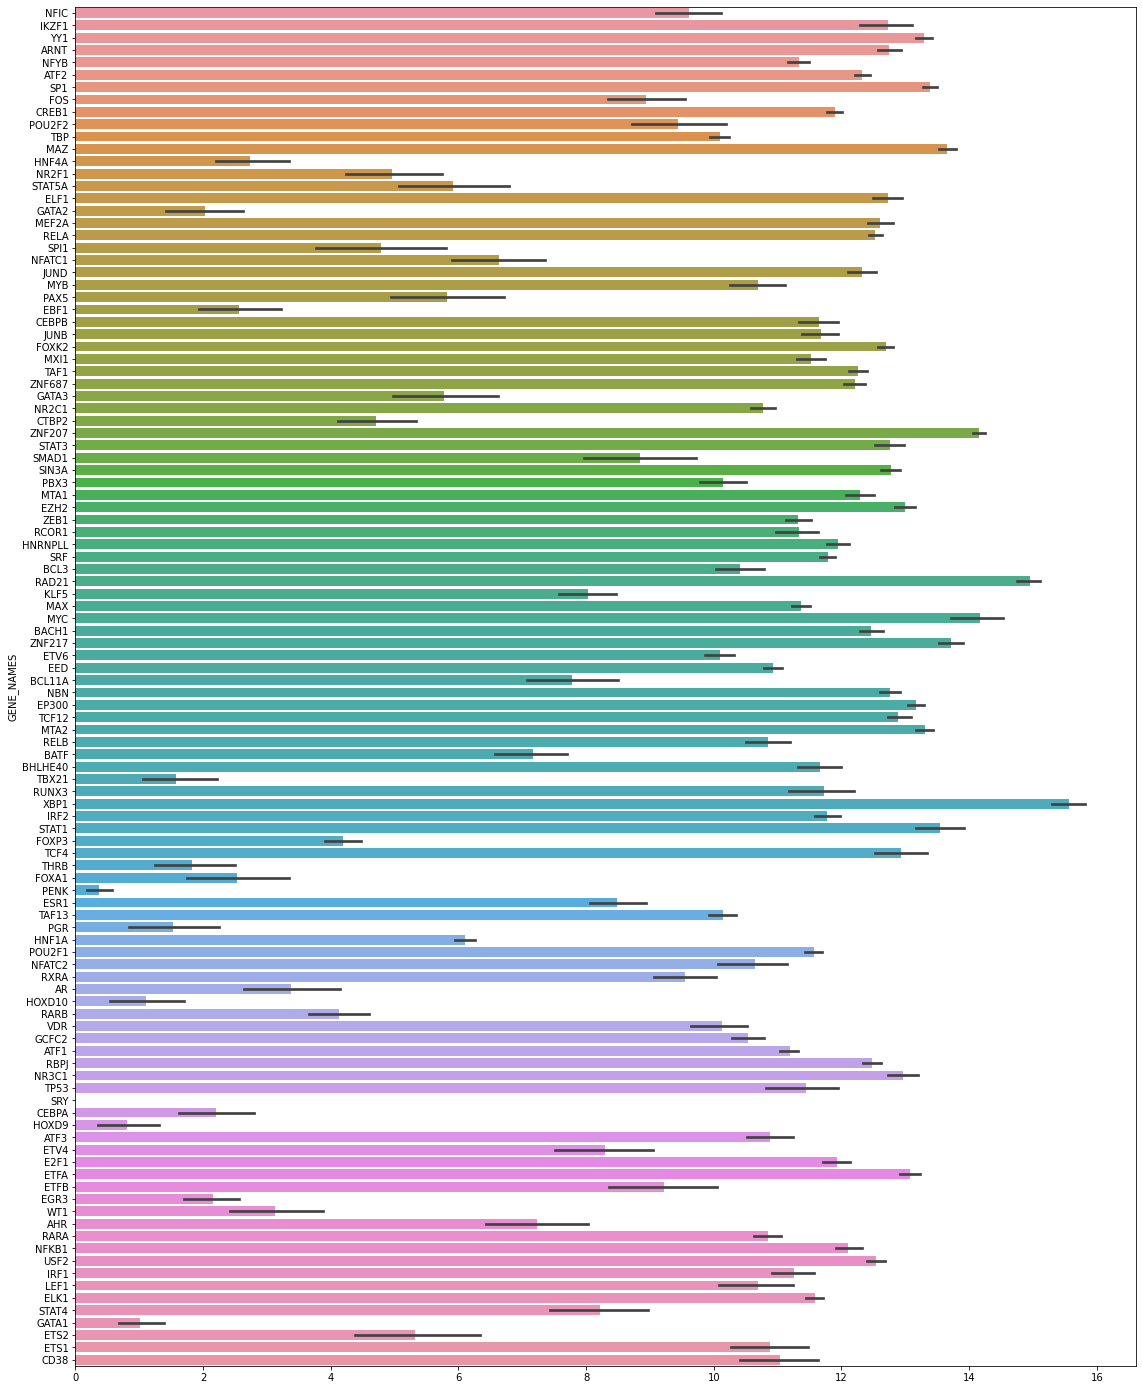

In [116]:
plt.figure(figsize=(19,25))

sns.barplot(data=goi_cell_log.drop('corp', axis = 1), orient = 'h')#, hue = 'corp')

# sns.barplot(data=goi_pat_log.drop('corp', axis = 1), orient = 'h')